In [36]:
import numpy as np
import pandas as pd
import missingno as msno
import os
import math
from scipy.io import arff
from sklearn import preprocessing
from numpy import mean

# Imbalanced data
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import TomekLinks

# identify outliers with interquartile range
from numpy.random import seed
from numpy.random import randn
from numpy import percentile

# Metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import statsmodels.api as sm

# Machine learning algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neural_network import MLPClassifier
# neural networks
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras import layers

# Visualisation
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

# For Filtering the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the dataset with pandas read_csv function
kidney_data = pd.read_csv(r"C:/Users/vanes/OneDrive/Data Science Project/EHRs Abu Dhabi Dataset/ChronicKidneyDisease_EHRs_from_AbuDhabi.csv")

Information about this dataset
This is a dataset of electronic medical records of 491 patients collected at the Tawam Hospital in Al-Ain city (Abu Dhabi, United Arab Emirates), between 1st January and 31st December 2008. The patients included 241 women and 250 men, with an average age of 53.2 years. Each patient has a chart of 22 clinical variables, expressing her/his values of laboratory tests and exams or data about her/his medical history. Each patient included in this study had cardovascular disease or was at risk of cardiovascular disease, according to the standards of Tawam Hospital.

Davide Chicco, Christopher A. Lovejoy, and Luca Oneto, "A machine learning analysis of health records of patients with chronic kidney disease at risk of cardiovascular disease" IEEE Access 9 (2021): 165132-165144.

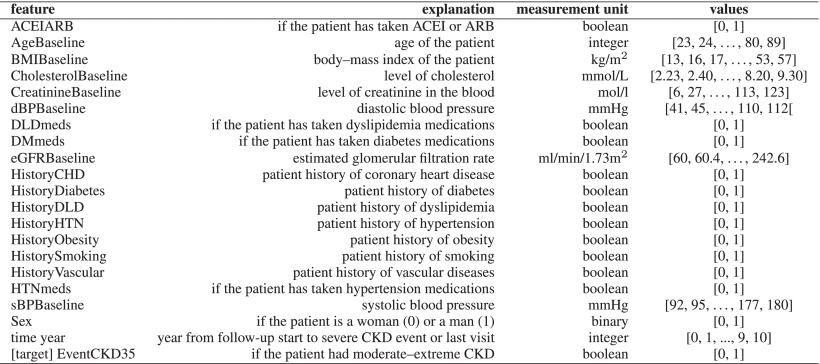

In [3]:
kidney_data.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
Sex,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AgeBaseline,64.0,52.0,56.0,58.0,63.0,51.0,71.0,44.0,54.0,44.0
HistoryDiabetes,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
HistoryCHD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
HistoryVascular,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
HistorySmoking,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
HistoryHTN,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
HistoryDLD,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
HistoryObesity,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
DLDmeds,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0


In [4]:
kidney_data.info() # to obtain a concise summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sex                  491 non-null    int64  
 1   AgeBaseline          491 non-null    int64  
 2   HistoryDiabetes      491 non-null    int64  
 3   HistoryCHD           491 non-null    int64  
 4   HistoryVascular      491 non-null    int64  
 5   HistorySmoking       491 non-null    int64  
 6   HistoryHTN           491 non-null    int64  
 7   HistoryDLD           491 non-null    int64  
 8   HistoryObesity       491 non-null    int64  
 9   DLDmeds              491 non-null    int64  
 10  DMmeds               491 non-null    int64  
 11  HTNmeds              491 non-null    int64  
 12  ACEIARB              491 non-null    int64  
 13  CholesterolBaseline  491 non-null    float64
 14  CreatinineBaseline   491 non-null    float64
 15  eGFRBaseline         491 non-null    flo

## Data Cleaning

In [3]:
kidney_data.isnull().sum()

Sex                    0
AgeBaseline            0
HistoryDiabetes        0
HistoryCHD             0
HistoryVascular        0
HistorySmoking         0
HistoryHTN             0
HistoryDLD             0
HistoryObesity         0
DLDmeds                0
DMmeds                 0
HTNmeds                0
ACEIARB                0
CholesterolBaseline    0
CreatinineBaseline     0
eGFRBaseline           0
sBPBaseline            0
dBPBaseline            0
BMIBaseline            0
TimeToEventMonths      0
EventCKD35             0
TIME_YEAR              0
dtype: int64

In [6]:
kidney_data.columns
# HistoryHTN has space after column name

Index(['Sex', 'AgeBaseline', 'HistoryDiabetes', 'HistoryCHD',
       'HistoryVascular', 'HistorySmoking', 'HistoryHTN ', 'HistoryDLD',
       'HistoryObesity', 'DLDmeds', 'DMmeds', 'HTNmeds', 'ACEIARB',
       'CholesterolBaseline', 'CreatinineBaseline', 'eGFRBaseline',
       'sBPBaseline', 'dBPBaseline', 'BMIBaseline', 'TimeToEventMonths',
       'EventCKD35', 'TIME_YEAR'],
      dtype='object')

In [4]:
kidney_data["Sex"] = kidney_data["Sex"].astype("category")
# medication use
kidney_data["DLDmeds"] = kidney_data["DLDmeds"].astype("category")
kidney_data["DMmeds"] = kidney_data["DMmeds"].astype("category")
kidney_data["HTNmeds"] = kidney_data["HTNmeds"].astype("category")
# testing for ACE & 
kidney_data["ACEIARB"] = kidney_data["ACEIARB"].astype("category")
# history of other chronic illnesses and CKD complications
kidney_data["HistoryDiabetes"] = kidney_data["HistoryDiabetes"].astype("category")
kidney_data["HistoryCHD"] = kidney_data["HistoryCHD"].astype("category")
kidney_data["HistoryVascular"] = kidney_data["HistoryVascular"].astype("category")
kidney_data["HistorySmoking"] = kidney_data["HistorySmoking"].astype("category")
kidney_data["HistoryObesity"] = kidney_data["HistoryObesity"].astype("category")
kidney_data["HistoryDLD"] = kidney_data["HistoryDLD"].astype("category")
kidney_data["HistoryHTN "] = kidney_data["HistoryHTN "].astype("category") # why key error for HistoryHTN??
# ckd or not ckd
kidney_data["EventCKD35"] = kidney_data["EventCKD35"].astype("category")

In [5]:
kidney_data.info() # to obtain a concise summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Sex                  491 non-null    category
 1   AgeBaseline          491 non-null    int64   
 2   HistoryDiabetes      491 non-null    category
 3   HistoryCHD           491 non-null    category
 4   HistoryVascular      491 non-null    category
 5   HistorySmoking       491 non-null    category
 6   HistoryHTN           491 non-null    category
 7   HistoryDLD           491 non-null    category
 8   HistoryObesity       491 non-null    category
 9   DLDmeds              491 non-null    category
 10  DMmeds               491 non-null    category
 11  HTNmeds              491 non-null    category
 12  ACEIARB              491 non-null    category
 13  CholesterolBaseline  491 non-null    float64 
 14  CreatinineBaseline   491 non-null    float64 
 15  eGFRBaseline         49

## Data Exploration

In [6]:
def extract_cat_num(kidney):
    categorical_col = [col for col in kidney.columns if kidney[col].dtype == 'category']
    numerical_col = [col for col in kidney.columns if kidney[col].dtype == 'float64' or kidney[col].dtype == 'int64']
    return categorical_col,numerical_col

In [7]:
categorical_col,numerical_col = extract_cat_num(kidney_data)

In [8]:
categorical_col

['Sex',
 'HistoryDiabetes',
 'HistoryCHD',
 'HistoryVascular',
 'HistorySmoking',
 'HistoryHTN ',
 'HistoryDLD',
 'HistoryObesity',
 'DLDmeds',
 'DMmeds',
 'HTNmeds',
 'ACEIARB',
 'EventCKD35']

In [9]:
numerical_col

['AgeBaseline',
 'CholesterolBaseline',
 'CreatinineBaseline',
 'eGFRBaseline',
 'sBPBaseline',
 'dBPBaseline',
 'BMIBaseline',
 'TimeToEventMonths',
 'TIME_YEAR']

In [10]:
for col in categorical_col:
    print('\nUnique Values in {} has\n{} '.format(col,kidney_data[col].value_counts()))
    print('\n')


Unique Values in Sex has
1    250
0    241
Name: Sex, dtype: int64 



Unique Values in HistoryDiabetes has
0    276
1    215
Name: HistoryDiabetes, dtype: int64 



Unique Values in HistoryCHD has
0    446
1     45
Name: HistoryCHD, dtype: int64 



Unique Values in HistoryVascular has
0    462
1     29
Name: HistoryVascular, dtype: int64 



Unique Values in HistorySmoking has
0    416
1     75
Name: HistorySmoking, dtype: int64 



Unique Values in HistoryHTN  has
1    335
0    156
Name: HistoryHTN , dtype: int64 



Unique Values in HistoryDLD has
1    317
0    174
Name: HistoryDLD, dtype: int64 



Unique Values in HistoryObesity has
1    248
0    243
Name: HistoryObesity, dtype: int64 



Unique Values in DLDmeds has
1    271
0    220
Name: DLDmeds, dtype: int64 



Unique Values in DMmeds has
0    330
1    161
Name: DMmeds, dtype: int64 



Unique Values in HTNmeds has
1    303
0    188
Name: HTNmeds, dtype: int64 



Unique Values in ACEIARB has
0    272
1    219
Name: ACEIARB

In [11]:
# obtain some summary statistics of the categorical columns
kidney_data[categorical_col].describe().transpose()

,count,unique,top,freq
Sex,491,2,1,250
HistoryDiabetes,491,2,0,276
HistoryCHD,491,2,0,446
HistoryVascular,491,2,0,462
HistorySmoking,491,2,0,416
HistoryHTN,491,2,1,335
HistoryDLD,491,2,1,317
HistoryObesity,491,2,1,248
DLDmeds,491,2,1,271
DMmeds,491,2,0,330


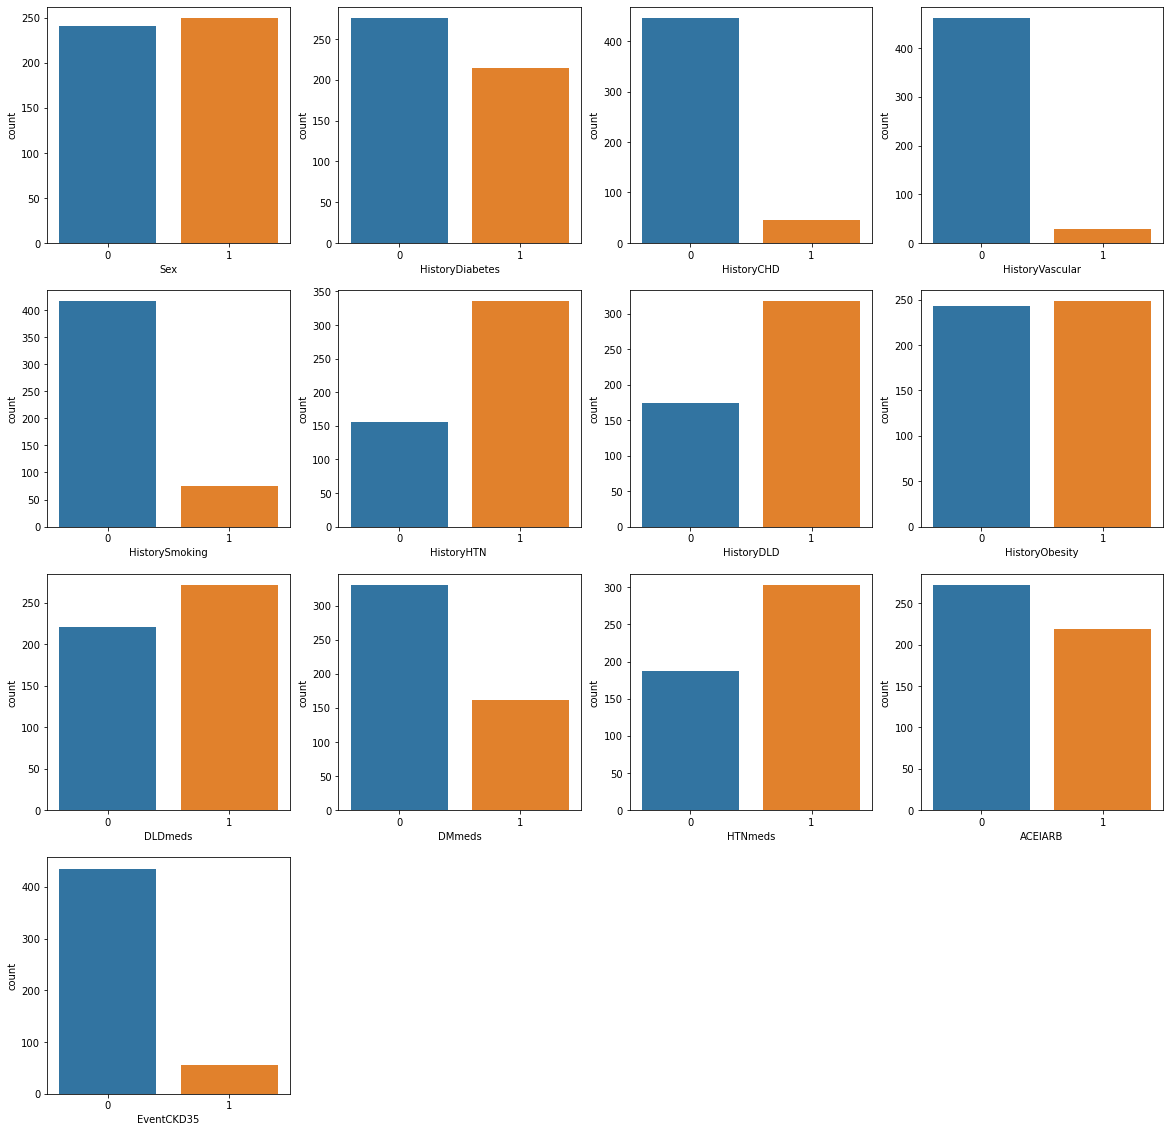

In [15]:
plt.figure(figsize=(20,20))

for i,feature in enumerate(categorical_col):
    plt.subplot(4,4,i+1)
    sns.countplot(kidney_data[feature])

In [16]:
# obtain some summary statistics of the numerical columns kidney_data[numerical_col].describe().transpose()
kidney_data[numerical_col].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AgeBaseline,491.0,53.203666,13.821282,23.00,44.0,54.0,64.00,89.0
CholesterolBaseline,491.0,4.978574,1.096702,2.23,4.2,5.0,5.77,9.3
CreatinineBaseline,491.0,67.856823,17.918627,6.00,55.0,66.0,78.50,123.0
eGFRBaseline,491.0,98.116090,18.503267,60.00,86.4,98.1,109.50,242.6
sBPBaseline,491.0,131.374745,15.692650,92.00,121.0,131.0,141.00,180.0
dBPBaseline,491.0,76.871690,10.711134,41.00,69.0,77.0,83.00,112.0
BMIBaseline,491.0,30.183299,6.236742,13.00,26.0,30.0,33.00,57.0
TimeToEventMonths,491.0,83.065173,26.011140,0.00,77.0,93.0,100.00,111.0
TIME_YEAR,491.0,6.940937,2.201710,0.00,6.0,8.0,8.00,9.0


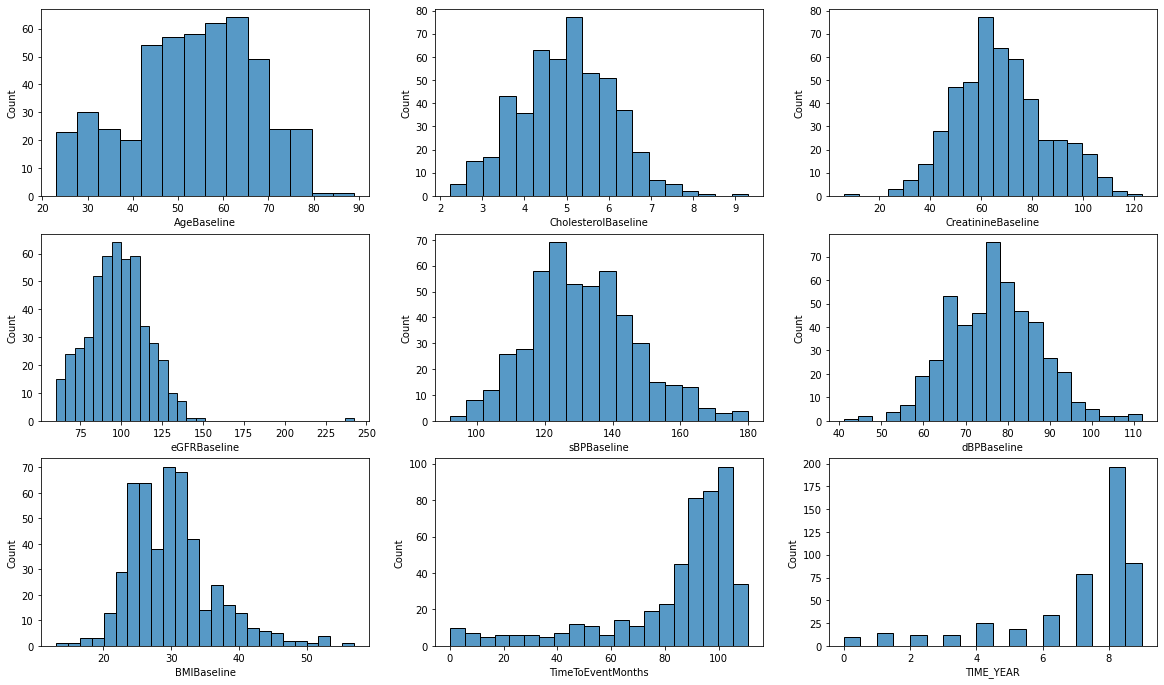

In [17]:
plt.figure(figsize=(20,20))

for i,feature in enumerate(numerical_col):
    plt.subplot(5,3,i+1)
    sns.histplot(kidney_data[feature])

<AxesSubplot:>

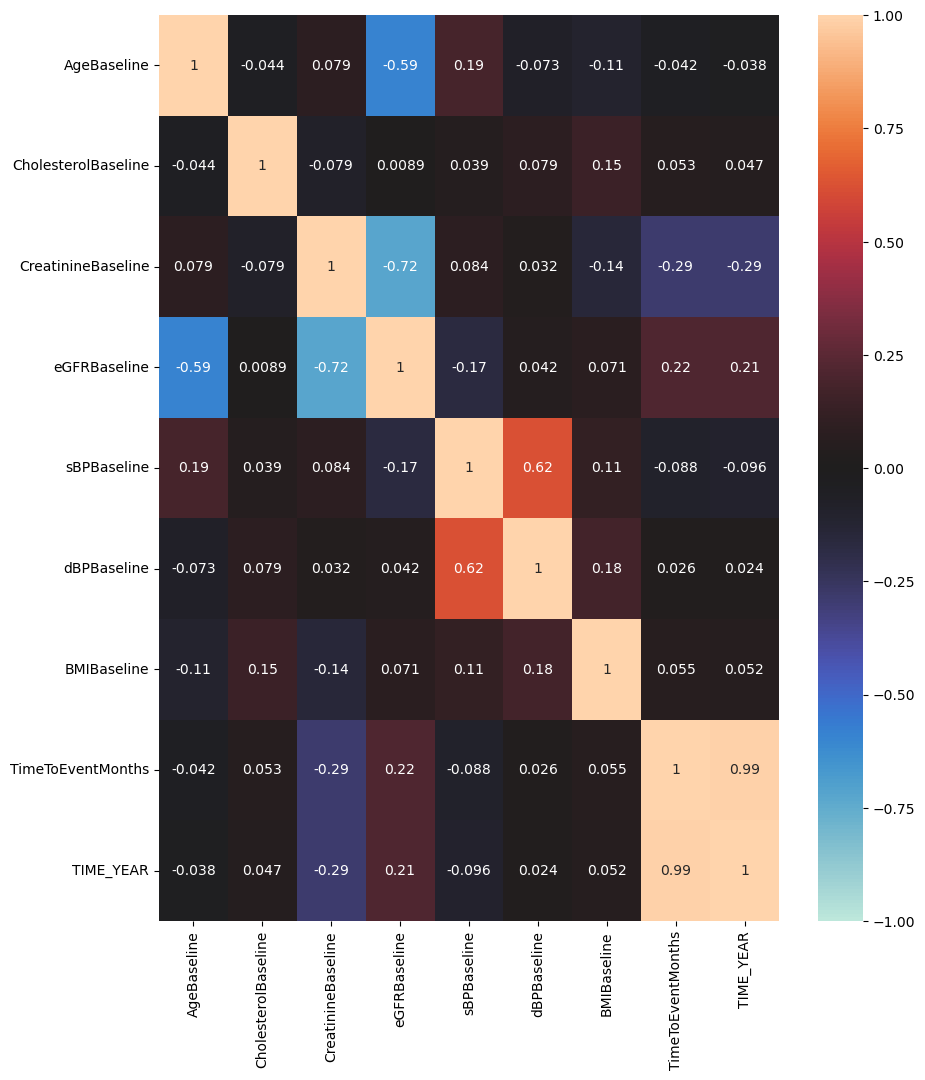

In [12]:
plt.figure(figsize=(10,12), dpi=100);

sns.heatmap(kidney_data.corr(),vmin=-1, vmax=1,annot=True, cmap = 'icefire')

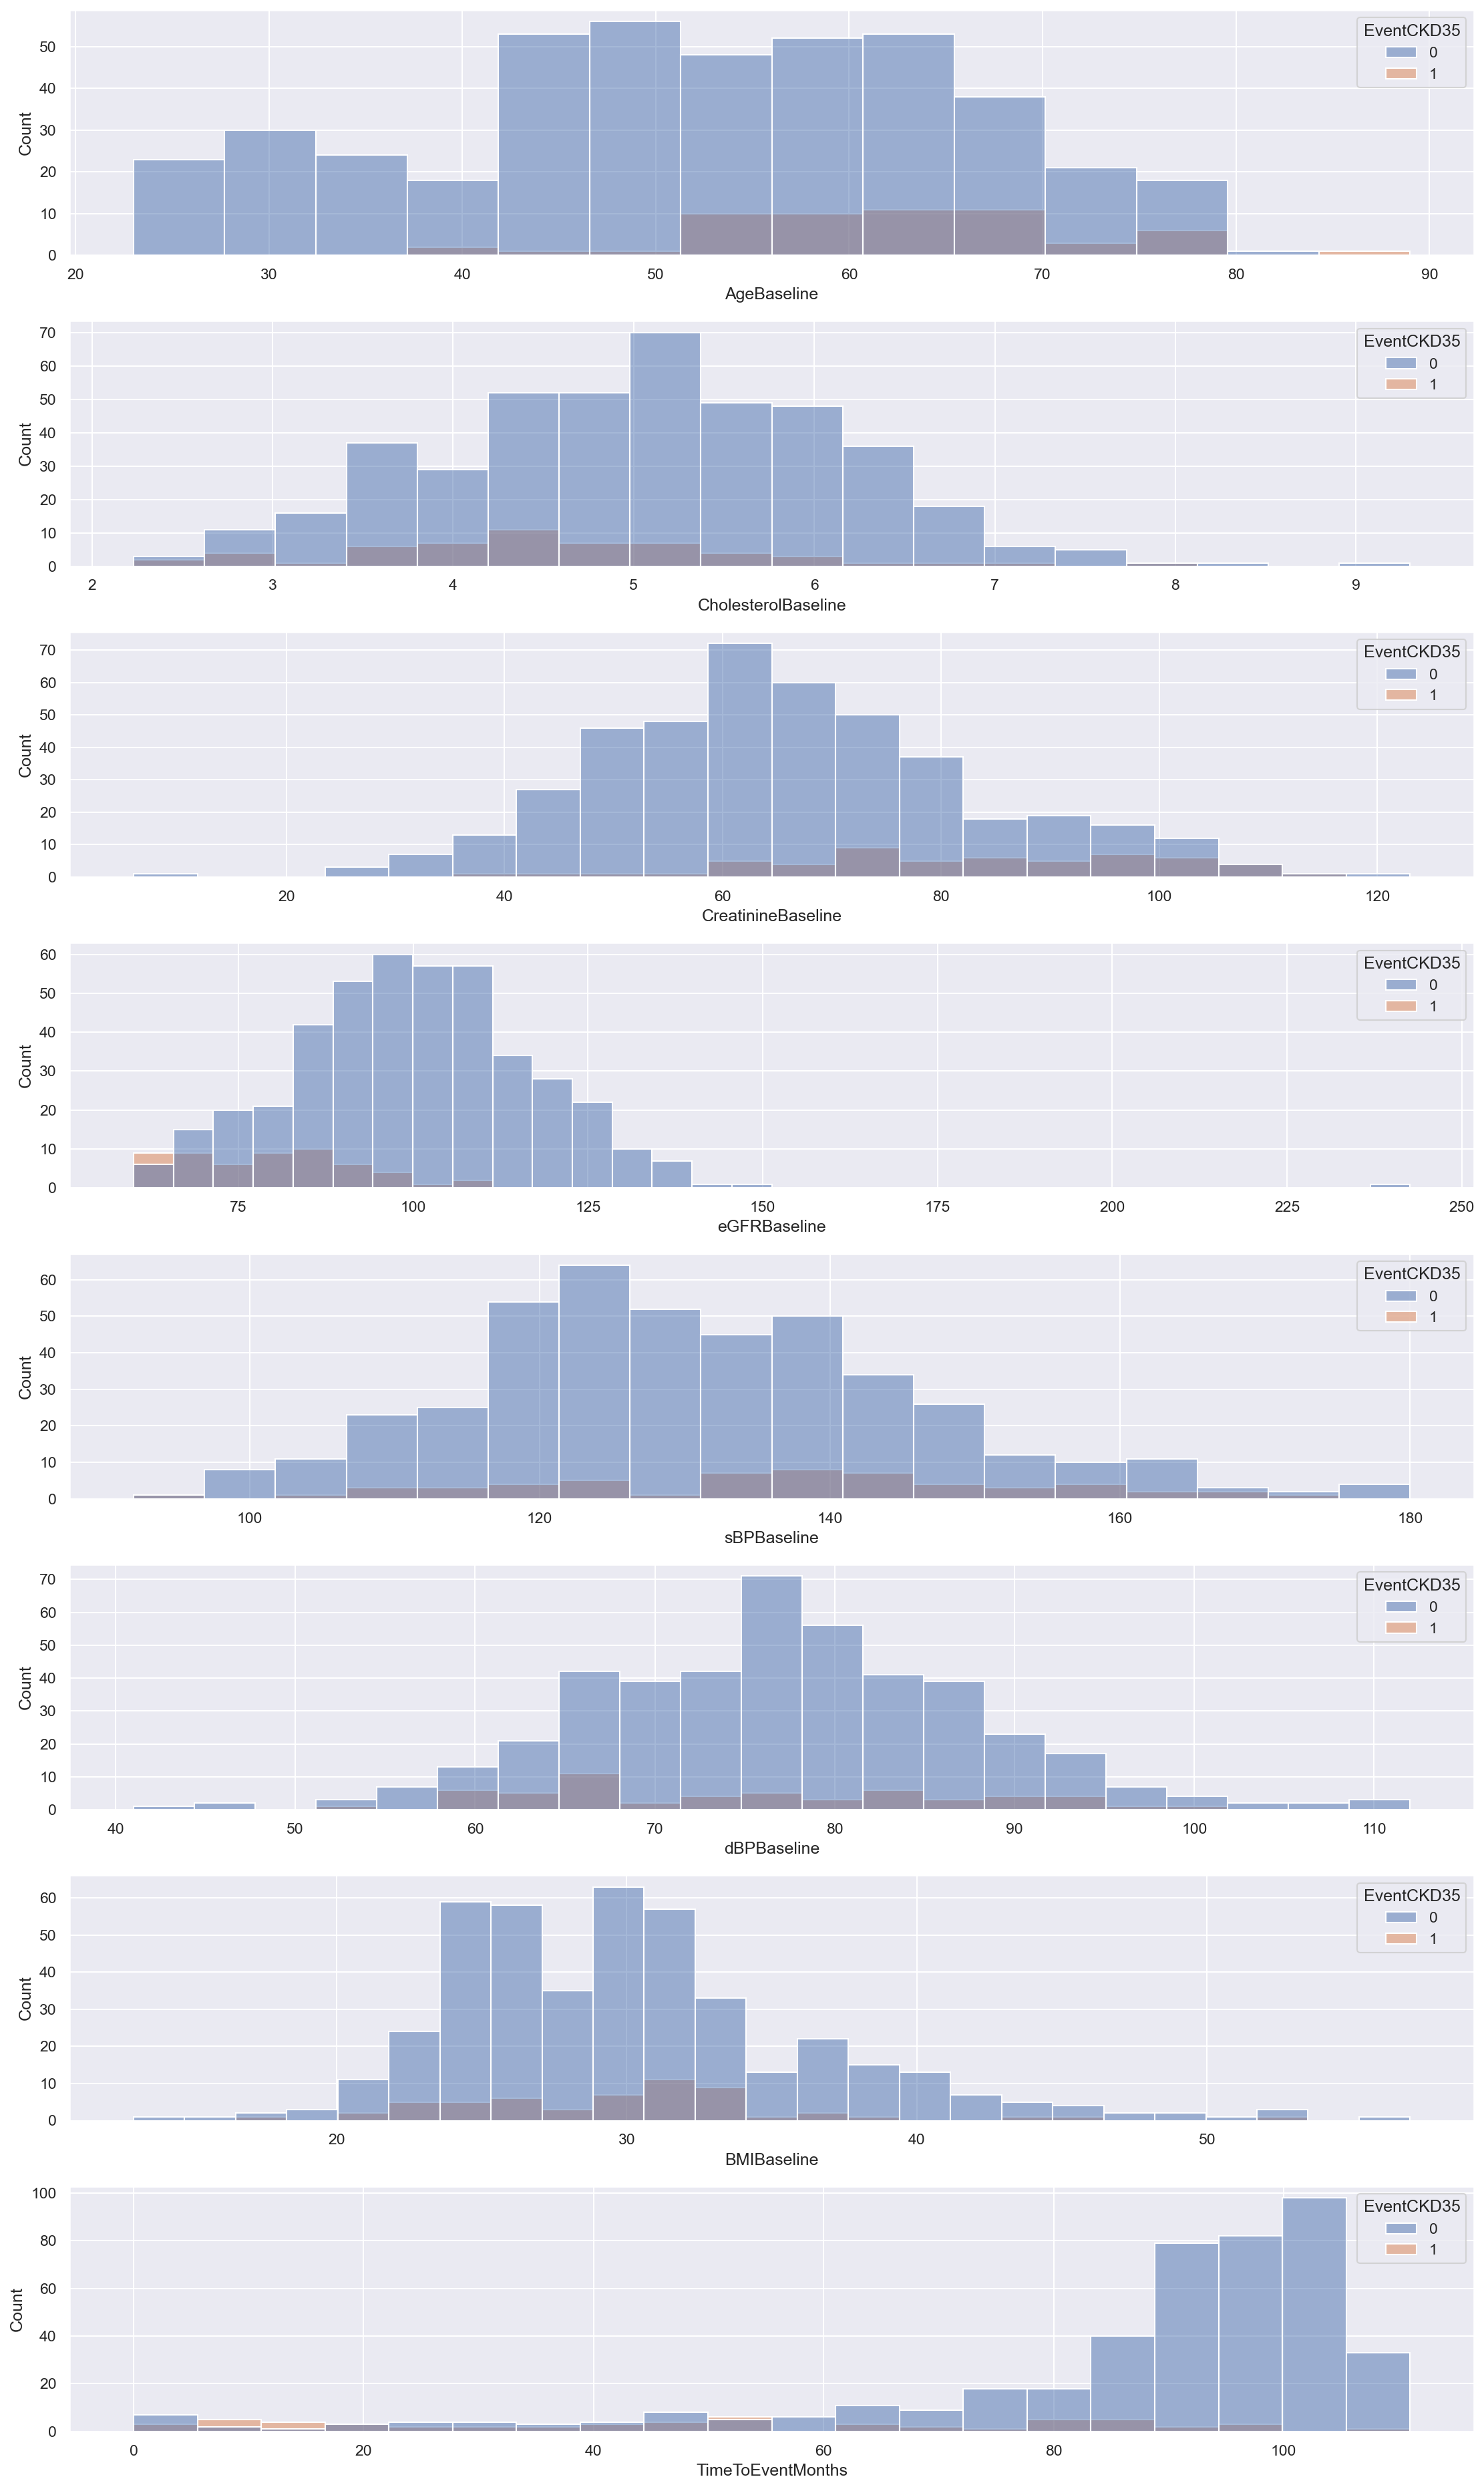

In [19]:
# Effect of seasons, holidays and function day on the bike rentals per hour
sns.set_theme(style="darkgrid")
fig, axs = plt.subplots(nrows=8,ncols=1,figsize=(15,25), dpi=150)

sns.histplot(data=kidney_data, x="AgeBaseline",  ax=axs[0],
            hue="EventCKD35")
sns.histplot(data=kidney_data, x="CholesterolBaseline", ax=axs[1], 
              hue="EventCKD35")
sns.histplot(data=kidney_data, x="CreatinineBaseline", ax=axs[2], 
              hue="EventCKD35")
sns.histplot(data=kidney_data, x="eGFRBaseline", ax=axs[3], 
              hue="EventCKD35")
sns.histplot(data=kidney_data, x="sBPBaseline", ax=axs[4], 
              hue="EventCKD35")
sns.histplot(data=kidney_data, x="dBPBaseline", ax=axs[5], 
              hue="EventCKD35")
sns.histplot(data=kidney_data, x="BMIBaseline", ax=axs[6], 
              hue="EventCKD35")
sns.histplot(data=kidney_data, x="TimeToEventMonths", ax=axs[7], 
              hue="EventCKD35")
plt.tight_layout()

In [20]:
# seed the random number generator
seed(1)
# calculate interquartile range
age_q25, age_q75 = percentile(kidney_data['AgeBaseline'], 25), percentile(kidney_data['AgeBaseline'], 75)
age_iqr = age_q75 - age_q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (age_q25, age_q75, age_iqr))
# calculate the outlier cutoff
cut_off = age_iqr * 1.5
lower, upper = age_q25 - cut_off, age_q75 + cut_off
# identify outliers
outliers = [x for x in kidney_data['AgeBaseline'] if x < lower or x > upper]
print('Identified outliers in Age Baseline: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in kidney_data['AgeBaseline'] if x >= lower and x <= upper]
print('Non-outlier observations in Age Baseline: %d' % len(outliers_removed))

Percentiles: 25th=44.000, 75th=64.000, IQR=20.000
Identified outliers in Age Baseline: 0
Non-outlier observations in Age Baseline: 491


In [21]:
# seed the random number generator
seed(1)
# calculate interquartile range
cholestrol_q25, cholestrol_q75 = percentile(kidney_data['CholesterolBaseline'], 25), percentile(kidney_data['CholesterolBaseline'], 75)
cholestrol_iqr = cholestrol_q75 - cholestrol_q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (cholestrol_q25, cholestrol_q75, cholestrol_iqr))
# calculate the outlier cutoff
cut_off = cholestrol_iqr * 1.5
lower, upper = cholestrol_q25 - cut_off, cholestrol_q75 + cut_off
# identify outliers
outliers = [x for x in kidney_data['CholesterolBaseline'] if x < lower or x > upper]
print('Identified outliers in Cholesterol Baseline: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in kidney_data['CholesterolBaseline'] if x >= lower and x <= upper]
print('Non-outlier observations in Cholesterol Baseline: %d' % len(outliers_removed))

Percentiles: 25th=4.200, 75th=5.770, IQR=1.570
Identified outliers in Cholesterol Baseline: 2
Non-outlier observations in Cholesterol Baseline: 489


In [22]:
# seed the random number generator
seed(1)
# calculate interquartile range
creatinine_q25, creatinine_q75 = percentile(kidney_data['CreatinineBaseline'], 25), percentile(kidney_data['CreatinineBaseline'], 75)
creatinine_iqr = creatinine_q75 - creatinine_q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (creatinine_q25, creatinine_q75, creatinine_iqr))
# calculate the outlier cutoff
cut_off = creatinine_iqr * 1.5
lower, upper = creatinine_q25 - cut_off, creatinine_q75 + cut_off
# identify outliers
outliers = [x for x in kidney_data['CreatinineBaseline'] if x < lower or x > upper]
print('Identified outliers in Creatinine Baseline: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in kidney_data['CreatinineBaseline'] if x >= lower and x <= upper]
print('Non-outlier observations in Creatinine Baseline: %d' % len(outliers_removed))

Percentiles: 25th=55.000, 75th=78.500, IQR=23.500
Identified outliers in Creatinine Baseline: 2
Non-outlier observations in Creatinine Baseline: 489


In [23]:
# seed the random number generator
seed(1)
# calculate interquartile range
eGFR_q25, eGFR_q75 = percentile(kidney_data['eGFRBaseline'], 25), percentile(kidney_data['eGFRBaseline'], 75)
eGFR_iqr = eGFR_q75 - eGFR_q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (eGFR_q25, eGFR_q75, eGFR_iqr))
# calculate the outlier cutoff
cut_off = eGFR_iqr * 1.5
lower, upper = eGFR_q25 - cut_off, eGFR_q75 + cut_off
# identify outliers
outliers = [x for x in kidney_data['eGFRBaseline'] if x < lower or x > upper]
print('Identified outliers in eGFR Baseline: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in kidney_data['eGFRBaseline'] if x >= lower and x <= upper]
print('Non-outlier observations in eGFR Baseline: %d' % len(outliers_removed))

Percentiles: 25th=86.400, 75th=109.500, IQR=23.100
Identified outliers in eGFR Baseline: 2
Non-outlier observations in eGFR Baseline: 489


In [24]:
# seed the random number generator
seed(1)
# calculate interquartile range
sBP_q25, sBP_q75 = percentile(kidney_data['sBPBaseline'], 25), percentile(kidney_data['sBPBaseline'], 75)
sBP_iqr = sBP_q75 - sBP_q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (sBP_q25, sBP_q75, sBP_iqr))
# calculate the outlier cutoff
cut_off = sBP_iqr * 1.5
lower, upper = sBP_q25 - cut_off, sBP_q75 + cut_off
# identify outliers
outliers = [x for x in kidney_data['sBPBaseline'] if x < lower or x > upper]
print('Identified outliers in sBP Baseline: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in kidney_data['sBPBaseline'] if x >= lower and x <= upper]
print('Non-outlier observations in sBP Baseline: %d' % len(outliers_removed))

Percentiles: 25th=121.000, 75th=141.000, IQR=20.000
Identified outliers in sBP Baseline: 6
Non-outlier observations in sBP Baseline: 485


In [25]:
# seed the random number generator
seed(1)
# calculate interquartile range
dBP_q25, dBP_q75 = percentile(kidney_data['dBPBaseline'], 25), percentile(kidney_data['dBPBaseline'], 75)
dBP_iqr = dBP_q75 - dBP_q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (dBP_q25, dBP_q75, dBP_iqr))
# calculate the outlier cutoff
cut_off = dBP_iqr * 1.5
lower, upper = dBP_q25 - cut_off, dBP_q75 + cut_off
# identify outliers
outliers = [x for x in kidney_data['dBPBaseline'] if x < lower or x > upper]
print('Identified outliers in dBP Baseline: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in kidney_data['dBPBaseline'] if x >= lower and x <= upper]
print('Non-outlier observations in dBP Baseline: %d' % len(outliers_removed))

Percentiles: 25th=69.000, 75th=83.000, IQR=14.000
Identified outliers in dBP Baseline: 8
Non-outlier observations in dBP Baseline: 483


In [26]:
# seed the random number generator
seed(1)
# calculate interquartile range
BMI_q25, BMI_q75 = percentile(kidney_data['BMIBaseline'], 25), percentile(kidney_data['BMIBaseline'], 75)
BMI_iqr = BMI_q75 - BMI_q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (BMI_q25, BMI_q75, BMI_iqr))
# calculate the outlier cutoff
cut_off = BMI_iqr * 1.5
lower, upper = BMI_q25 - cut_off, BMI_q75 + cut_off
# identify outliers
outliers = [x for x in kidney_data['BMIBaseline'] if x < lower or x > upper]
print('Identified outliers in BMI Baseline: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in kidney_data['BMIBaseline'] if x >= lower and x <= upper]
print('Non-outlier observations in BMI Baseline: %d' % len(outliers_removed))

Percentiles: 25th=26.000, 75th=33.000, IQR=7.000
Identified outliers in BMI Baseline: 19
Non-outlier observations in BMI Baseline: 472


In [27]:
# seed the random number generator
seed(1)
# calculate interquartile range
time_ckd_q25, time_ckd_q75 = percentile(kidney_data['TimeToEventMonths'], 25), percentile(kidney_data['TimeToEventMonths'], 75)
time_ckd_iqr = time_ckd_q75 - time_ckd_q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (time_ckd_q25, time_ckd_q75, time_ckd_iqr))
# calculate the outlier cutoff
cut_off = time_ckd_iqr * 1.5
lower, upper = time_ckd_q25 - cut_off, time_ckd_q75 + cut_off
# identify outliers
outliers = [x for x in kidney_data['TimeToEventMonths'] if x < lower or x > upper]
print('Identified outliers in Time To Event Months: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in kidney_data['TimeToEventMonths'] if x >= lower and x <= upper]
print('Non-outlier observations in Time To Event Months: %d' % len(outliers_removed))

Percentiles: 25th=77.000, 75th=100.000, IQR=23.000
Identified outliers in Time To Event Months: 49
Non-outlier observations in Time To Event Months: 442


In [28]:
# seed the random number generator
seed(1)
# calculate interquartile range
time_q25, time_q75 = percentile(kidney_data['TIME_YEAR'], 25), percentile(kidney_data['TIME_YEAR'], 75)
time_iqr = time_q75 - time_q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (time_q25, time_q75, time_iqr))
# calculate the outlier cutoff
cut_off = time_iqr * 1.5
lower, upper = time_q25 - cut_off, time_q75 + cut_off
# identify outliers
outliers = [x for x in kidney_data['TIME_YEAR'] if x < lower or x > upper]
print('Identified outliers in TIME YEAR: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in kidney_data['TIME_YEAR'] if x >= lower and x <= upper]
print('Non-outlier observations in TIME YEAR: %d' % len(outliers_removed))

Percentiles: 25th=6.000, 75th=8.000, IQR=2.000
Identified outliers in TIME YEAR: 36
Non-outlier observations in TIME YEAR: 455


Perhaps, the outliers can stay because they may be valid outliers. Higher or lower values of any numerical feature that goes beyond the normal values indicates a health issue which would assist in the detection of CKD. 

However, to test this theory, outliers shall be removed and the class distribution will be analysed.

In [29]:
kidney_outliers = kidney_data.copy()

# Baseline 1: Outliers kept
df_x = kidney_outliers.drop(['EventCKD35'], axis=1)
df_y = kidney_outliers['EventCKD35']

In [30]:
# summarize class distribution
print("Class distribution before outlier removal: ",Counter(df_y))

Class distribution before outlier removal:  Counter({0: 435, 1: 56})


In [31]:
# Remove outliers from the variable CholesterolBaseline
df_x = df_x.query('CholesterolBaseline>= (@cholestrol_q25 - @cholestrol_iqr) & CholesterolBaseline <= (@cholestrol_q75 + @cholestrol_iqr) ')
df_y = df_y[df_x.index]

# Remove outliers from the variable CreatinineBaseline
df_x = df_x.query('CreatinineBaseline>= (@creatinine_q25 - @creatinine_iqr) & CreatinineBaseline <= (@creatinine_q75 + @creatinine_iqr) ')
df_y = df_y[df_x.index]

# Remove outliers from the variable eGFRBaseline
df_x = df_x.query('eGFRBaseline>= (@eGFR_q25 - @eGFR_iqr) & eGFRBaseline <= (@eGFR_q75 + @eGFR_iqr) ')
df_y = df_y[df_x.index]

# Remove outliers from the variable sBPBaseline
df_x = df_x.query('sBPBaseline>= (@sBP_q25 - @sBP_iqr) & sBPBaseline <= (@sBP_q75 + @sBP_iqr) ')
df_y = df_y[df_x.index]

# Remove outliers from the variable dBPBaseline
df_x = df_x.query('dBPBaseline>= (@dBP_q25 - @dBP_iqr) & dBPBaseline <= (@dBP_q75 + @dBP_iqr) ')
df_y = df_y[df_x.index]

# Remove outliers from the variable BMIBaseline
df_x = df_x.query('BMIBaseline>= (@BMI_q25 - @BMI_iqr) & BMIBaseline <= (@BMI_q75 + @BMI_iqr) ')
df_y = df_y[df_x.index]

# Remove outliers from the variable TIME_YEAR
df_x = df_x.query('TIME_YEAR>= (@time_q25 - @time_iqr) & TIME_YEAR <= (@time_q75 + @time_iqr) ')
df_y = df_y[df_x.index]

# Remove outliers from the variable TimeToEventMonths
df_x = df_x.query('TimeToEventMonths>= (@time_ckd_q25 - @time_ckd_iqr) & TimeToEventMonths <= (@time_ckd_q75 + @time_ckd_iqr) ')
df_y = df_y[df_x.index]

In [32]:
df_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 323 entries, 0 to 486
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Sex                  323 non-null    category
 1   AgeBaseline          323 non-null    int64   
 2   HistoryDiabetes      323 non-null    category
 3   HistoryCHD           323 non-null    category
 4   HistoryVascular      323 non-null    category
 5   HistorySmoking       323 non-null    category
 6   HistoryHTN           323 non-null    category
 7   HistoryDLD           323 non-null    category
 8   HistoryObesity       323 non-null    category
 9   DLDmeds              323 non-null    category
 10  DMmeds               323 non-null    category
 11  HTNmeds              323 non-null    category
 12  ACEIARB              323 non-null    category
 13  CholesterolBaseline  323 non-null    float64 
 14  CreatinineBaseline   323 non-null    float64 
 15  eGFRBaseline         32

In [33]:
# summarize class distribution
print("Class distribution after outlier removal: ",Counter(df_y))

Class distribution after outlier removal:  Counter({0: 306, 1: 17})


## Feature Engineering

### Oversampling & Undersampling Techniques

In [13]:
kidney_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Sex                  491 non-null    category
 1   AgeBaseline          491 non-null    int64   
 2   HistoryDiabetes      491 non-null    category
 3   HistoryCHD           491 non-null    category
 4   HistoryVascular      491 non-null    category
 5   HistorySmoking       491 non-null    category
 6   HistoryHTN           491 non-null    category
 7   HistoryDLD           491 non-null    category
 8   HistoryObesity       491 non-null    category
 9   DLDmeds              491 non-null    category
 10  DMmeds               491 non-null    category
 11  HTNmeds              491 non-null    category
 12  ACEIARB              491 non-null    category
 13  CholesterolBaseline  491 non-null    float64 
 14  CreatinineBaseline   491 non-null    float64 
 15  eGFRBaseline         49

### Oversampling: SMOTE

In [16]:
# data split
X_df = kidney_data.drop(['EventCKD35'], axis=1)
y_df = kidney_data['EventCKD35']

In [17]:
print("Oversampling on the data")

# summarize class distribution
print("\nBefore oversampling: ",Counter(y_df))

# define oversampling strategy
oversampling = SMOTENC(random_state=42, categorical_features=[0,2,3,4,5,6,7,8,9,10,11,12,20])

# fit and apply the transform
X_df_SMOTE, y_df_SMOTE = oversampling.fit_resample(X_df, y_df)

# summarize class distribution
print("After oversampling: ",Counter(y_df_SMOTE))

Oversampling on the data

Before oversampling:  Counter({0: 435, 1: 56})
After oversampling:  Counter({0: 435, 1: 435})


### Undersampling: Tomek links

In [18]:
print("Undersampling on the data")

# summarize class distribution
print("Before undersampling: ",Counter(y_df))

# define undersampling strategy
undersample = TomekLinks()

# fit and apply the transform
X_df_TK, y_df_TK = undersample.fit_resample(X_df, y_df)

# summarize class distribution
print("After undersampling: ",Counter(y_df_TK))

Undersampling on the data
Before undersampling:  Counter({0: 435, 1: 56})
After undersampling:  Counter({0: 420, 1: 56})


### Feature selection

### Feature selection on oversampled data

In [27]:
## backward elimination
# backward regression
Selected_Features = []

def backward_regression(X, y, initial_list=[], threshold_out=0.05, verbose=True):
    """To select feature with Backward Stepwise Regression 

    Args:
        X -- features values
        y -- target variable
        initial_list -- features header
        threshold_out -- pvalue threshold of features to drop
        verbose -- true to produce lots of logging output

    Returns:
        list of selected features for modeling 
    """
    included = list(X.columns)
    while True:
        changed = False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()  # null if pvalues is empty
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(f"worst_feature : {worst_feature}, {worst_pval} ")
        if not changed:
            break
    Selected_Features.append(included)
    print(f"\nSelected Features:\n{Selected_Features[0]}")

In [20]:
# Application of the backward regression function on the data
backward_regression(X_df_SMOTE, y_df_SMOTE)

worst_feature : TimeToEventMonths, 0.9055071282142682 
worst_feature : DLDmeds, 0.7314827855534087 
worst_feature : HTNmeds, 0.6896063100350491 
worst_feature : CreatinineBaseline, 0.5856389946370575 
worst_feature : Sex, 0.5187093012657279 
worst_feature : HistoryObesity, 0.46268032936173864 
worst_feature : AgeBaseline, 0.22778881276895427 
worst_feature : HistorySmoking, 0.16368914773106374 
worst_feature : HistoryHTN , 0.11299880194654487 
worst_feature : BMIBaseline, 0.09396010329668111 

Selected Features:
['HistoryDiabetes', 'HistoryCHD', 'HistoryVascular', 'HistoryDLD', 'DMmeds', 'ACEIARB', 'CholesterolBaseline', 'eGFRBaseline', 'sBPBaseline', 'dBPBaseline', 'TIME_YEAR']


In [21]:
# copy original descriptive features smote set
X_df1_SMOTE = X_df_SMOTE.copy()

In [22]:
# Keep the selected features only
X_df1_SMOTE = X_df1_SMOTE.loc[:, Selected_Features[0]]

In [23]:
X_df1_SMOTE.head(5)

,HistoryDiabetes,HistoryCHD,HistoryVascular,HistoryDLD,DMmeds,ACEIARB,CholesterolBaseline,eGFRBaseline,sBPBaseline,dBPBaseline,TIME_YEAR
0,0,0,0,1,0,0,4.8,93.3,144,87,8
1,0,0,0,1,0,0,6.4,105.8,148,91,9
2,0,0,0,1,0,0,6.4,99.8,149,86,7
3,0,0,0,1,0,0,5.1,90.3,116,68,9
4,1,0,0,1,1,1,5.0,79.7,132,63,9


<AxesSubplot:>

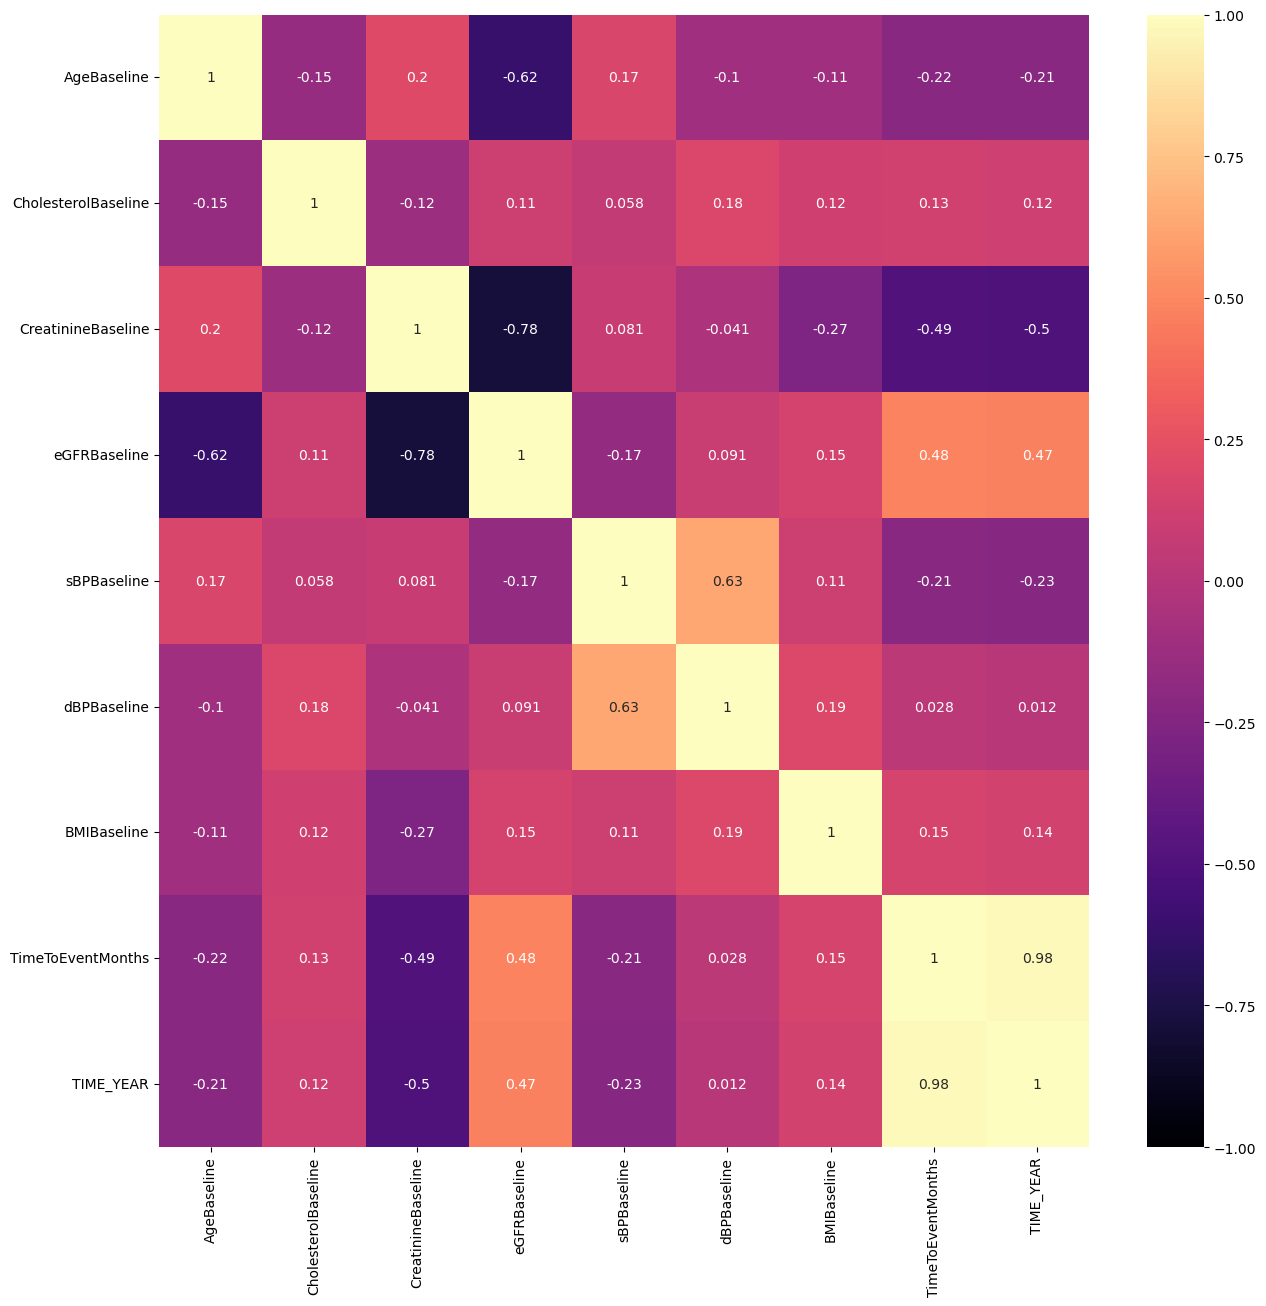

In [24]:
# feature selection using correlation matrix
# Feature selection
# correlations
plt.figure(figsize=(15,15), dpi=100);

sns.heatmap(X_df_SMOTE.corr(),vmin=-1, vmax=1,annot=True, cmap = 'magma')

In [25]:
# high correlation between TimeToEeventMonths and TIME_YEAR
X_df2_SMOTE = X_df_SMOTE.copy()
X_df2_SMOTE = X_df2_SMOTE.drop(['TIME_YEAR'], axis=1)

<AxesSubplot:>

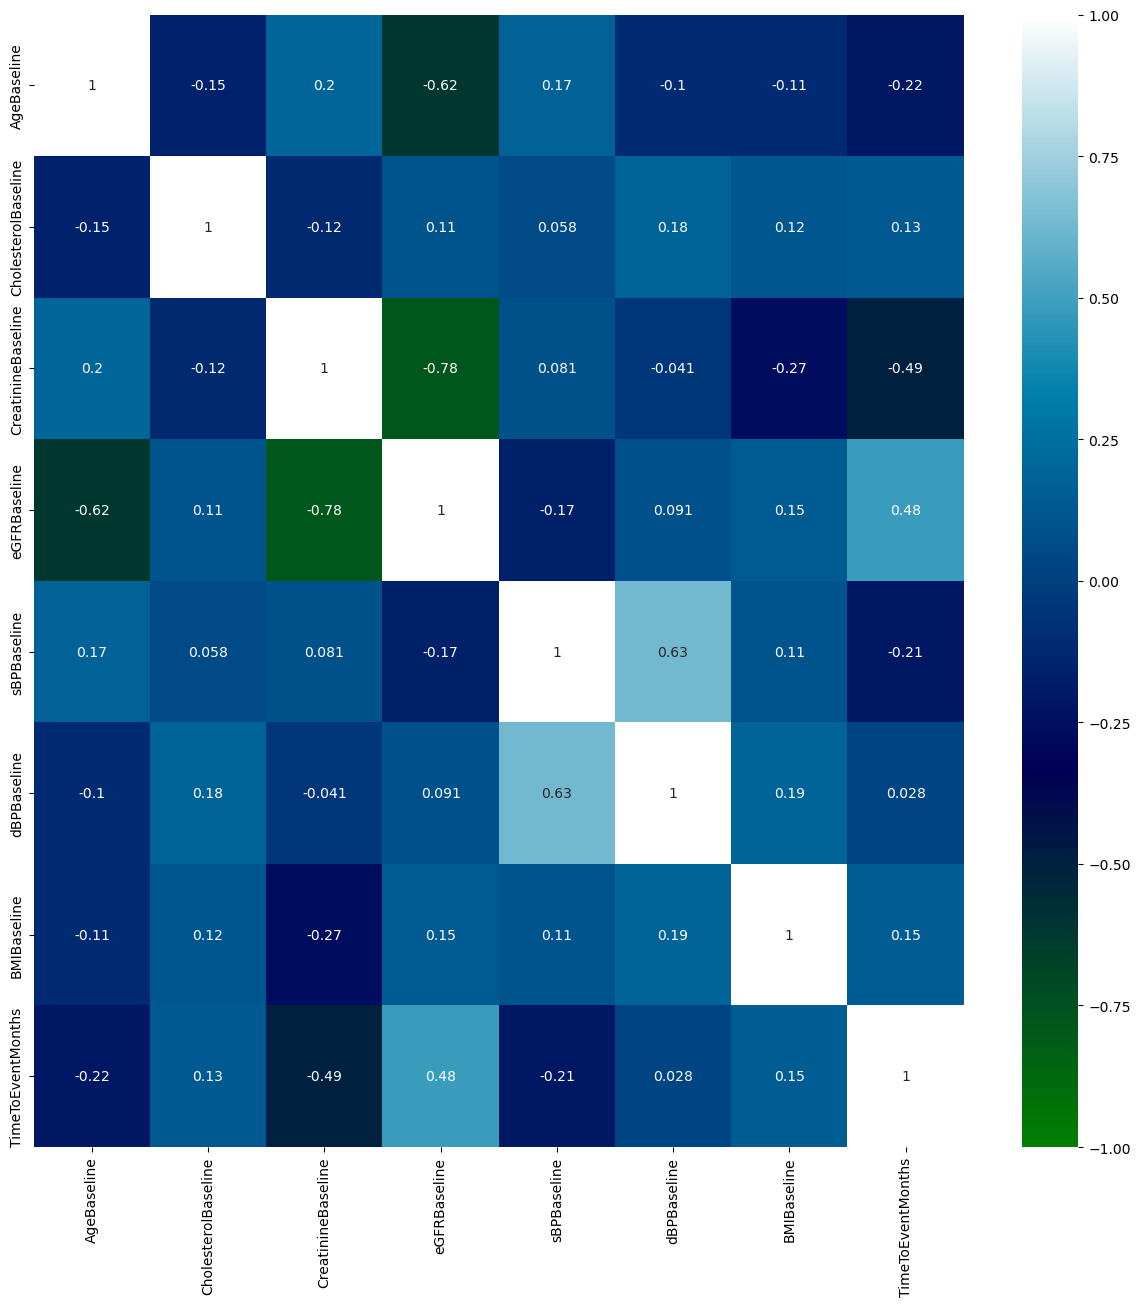

In [26]:
# feature selection using correlation matrix
# Feature selection
# correlations
plt.figure(figsize=(15,15), dpi=100);

sns.heatmap(X_df2_SMOTE.corr(),vmin=-1, vmax=1,annot=True, cmap = 'ocean')

### Feature selection on undersampled data

In [28]:
# Application of the backward regression function on the data
backward_regression(X_df_TK, y_df_TK)

worst_feature : BMIBaseline, 0.8758903935566074 
worst_feature : eGFRBaseline, 0.7900390783224813 
worst_feature : TIME_YEAR, 0.5902015445021207 
worst_feature : HistoryObesity, 0.44312619228520267 
worst_feature : HistoryVascular, 0.45182033352654705 
worst_feature : HistoryDiabetes, 0.40519110662257884 
worst_feature : DLDmeds, 0.36768224367290203 
worst_feature : HistoryDLD, 0.7141549012788391 
worst_feature : sBPBaseline, 0.22089164015813115 
worst_feature : HistoryCHD, 0.1174817720671894 

Selected Features:
['Sex', 'AgeBaseline', 'HistorySmoking', 'HistoryHTN ', 'DMmeds', 'HTNmeds', 'ACEIARB', 'CholesterolBaseline', 'CreatinineBaseline', 'dBPBaseline', 'TimeToEventMonths']


In [29]:
# copy of the tomek links descriptive features to hold the selected features
X_df1_TK = X_df_TK.copy()

# Keep the selected features only
X_df1_TK = X_df1_TK.loc[:, Selected_Features[0]]
X_df1_TK.head(5)

,Sex,AgeBaseline,HistorySmoking,HistoryHTN,DMmeds,HTNmeds,ACEIARB,CholesterolBaseline,CreatinineBaseline,dBPBaseline,TimeToEventMonths
0,0,64,0,1,0,1,0,4.8,59.0,87,98
1,0,52,0,1,0,1,0,6.4,52.0,91,106
2,0,56,0,1,0,1,0,6.4,57.0,86,88
3,0,58,0,0,0,0,0,5.1,65.0,68,103
4,0,63,0,1,1,1,1,5.0,70.0,63,105


<AxesSubplot:>

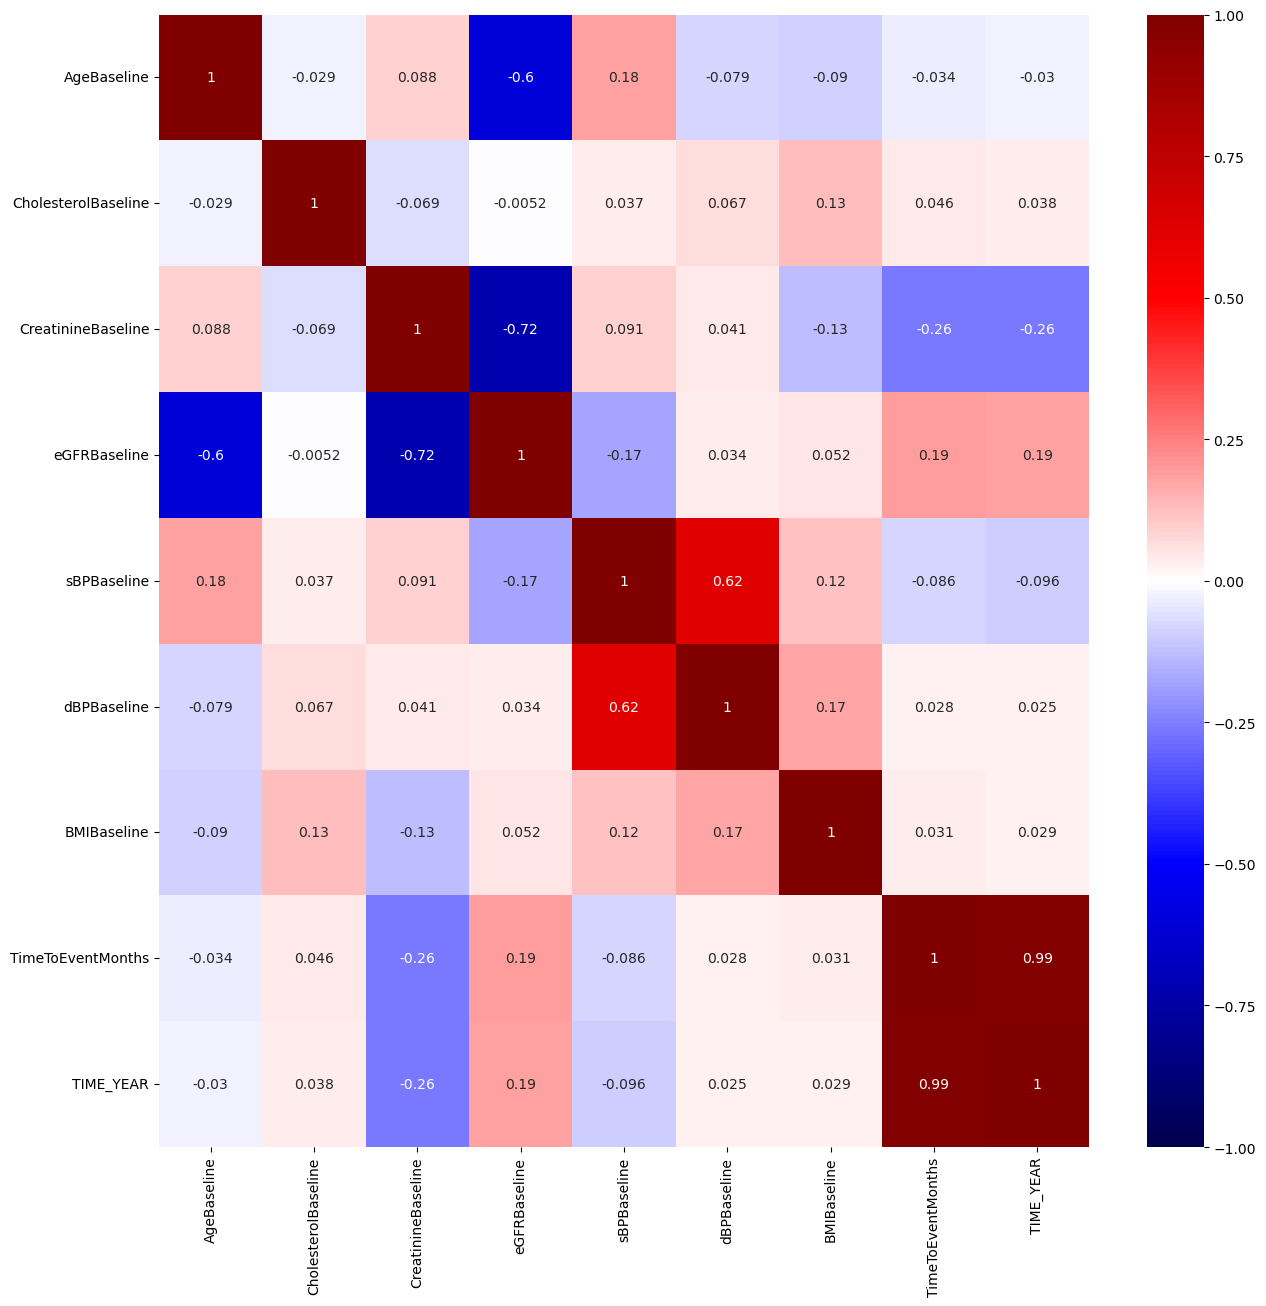

In [30]:
# feature selection using correlation matrix
# Feature selection
# correlations
plt.figure(figsize=(15,15), dpi=100);

sns.heatmap(X_df_TK.corr(),vmin=-1, vmax=1,annot=True, cmap = 'seismic')

In [31]:
# high correlation between TimeToEeventMonths and TIME_YEAR
X_df2_TK = X_df_TK.copy()
X_df2_TK = X_df2_TK.drop(['TIME_YEAR'], axis=1)

# ALGORITHM IMPLEMENTATION

#### Sets of data

Unsampled data

X_df, y_df

Oversampling sets

X_df_SMOTE, y_df_SMOTE (full)

X_df1_SMOTE, y_df_SMOTE (reduced by 10)

X_df2_SMOTE, y_df_SMOTE (reduced by 1)



Undersampling sets

X_df_TK, y_df_TK (full)

X_df1_TK, y_df_TK (reduced by 10)

X_df2_TK, y_df_TK (reduced by 1)

#### Data Splitting

In [32]:
# for unsampled data

train_X0, test_X0, train_Y0, test_Y0 = train_test_split(X_df, y_df, test_size=0.3, random_state=1234)
#test_X0, validation_X0, test_Y0, validation_Y0 = train_test_split(val_X0, val_Y0, test_size=0.5, random_state=1234)

print("Shape of split data of the unsampled set:")
print("Magnitude of the descriptive training features:", train_X0.shape)
print("Magnitude of the target training features:", train_Y0.shape)
print("Magnitude of the descriptive test features:", test_X0.shape)
print("Magnitude of the target test features:", test_Y0.shape)

###############################################

# for oversampled data

train_X1, test_X1, train_Y1, test_Y1 = train_test_split(X_df_SMOTE, y_df_SMOTE, test_size=0.3, random_state=1234)
#test_X0, validation_X0, test_Y0, validation_Y0 = train_test_split(val_X0, val_Y0, test_size=0.5, random_state=1234)

print("\n\n\nShape of split data of the oversampled set 1 with no feature selection:")
print("Magnitude of the descriptive training features:", train_X1.shape)
print("Magnitude of the target training features:", train_Y1.shape)
print("Magnitude of the descriptive test features:", test_X1.shape)
print("Magnitude of the target test features:", test_Y1.shape)


###############################################


train_X2, test_X2, train_Y2, test_Y2 = train_test_split(X_df1_SMOTE, y_df_SMOTE, test_size=0.3, random_state=1234)
#test_X1, validation_X1, test_Y1, validation_Y1 = train_test_split(val_X1, val_Y1, test_size=0.5, random_state=1234)

print("\n\n\nShape of split data of the oversampled set 2 with backward elimination feature selection:")
print("Magnitude of the descriptive training features:", train_X2.shape)
print("Magnitude of the target training features:", train_Y2.shape)
print("Magnitude of the descriptive test features:", test_X2.shape)
print("Magnitude of the target test features:", test_Y2.shape)


###############################################


train_X3, test_X3, train_Y3, test_Y3 = train_test_split(X_df2_SMOTE, y_df_SMOTE, test_size=0.3, random_state=1234)
#test_X2, validation_X2, test_Y2, validation_Y2 = train_test_split(val_X2, val_Y2, test_size=0.5, random_state=1234)

print("\n\n\nShape of split data of the oversampled set 3 with correlation feature selection:")
print("Magnitude of the descriptive training features:", train_X3.shape)
print("Magnitude of the target training features:", train_Y3.shape)
print("Magnitude of the descriptive test features:", test_X3.shape)
print("Magnitude of the target test features:", test_Y3.shape)

Shape of split data of the unsampled set:
Magnitude of the descriptive training features: (343, 21)
Magnitude of the target training features: (343,)
Magnitude of the descriptive test features: (148, 21)
Magnitude of the target test features: (148,)



Shape of split data of the oversampled set 1 with no feature selection:
Magnitude of the descriptive training features: (609, 21)
Magnitude of the target training features: (609,)
Magnitude of the descriptive test features: (261, 21)
Magnitude of the target test features: (261,)



Shape of split data of the oversampled set 2 with backward elimination feature selection:
Magnitude of the descriptive training features: (609, 11)
Magnitude of the target training features: (609,)
Magnitude of the descriptive test features: (261, 11)
Magnitude of the target test features: (261,)



Shape of split data of the oversampled set 3 with correlation feature selection:
Magnitude of the descriptive training features: (609, 20)
Magnitude of the target 

In [33]:
# for undersampled data

train_X4, test_X4, train_Y4, test_Y4 = train_test_split(X_df_TK, y_df_TK, test_size=0.3, random_state=1234)

print("\n\n\nShape of split data of the undersampled set 1 with no feature selection:")
print("Magnitude of the descriptive training features:", train_X4.shape)
print("Magnitude of the target training features:", train_Y4.shape)
print("Magnitude of the descriptive test features:", test_X4.shape)
print("Magnitude of the target test features:", test_Y4.shape)


###############################################


train_X5, test_X5, train_Y5, test_Y5 = train_test_split(X_df1_TK, y_df_TK, test_size=0.3, random_state=1234)

print("\n\n\nShape of split data of the undersampled set 2 with backward elimination feature selection:")
print("Magnitude of the descriptive training features:", train_X5.shape)
print("Magnitude of the target training features:", train_Y5.shape)
print("Magnitude of the descriptive test features:", test_X5.shape)
print("Magnitude of the target test features:", test_Y5.shape)


###############################################


train_X6, test_X6, train_Y6, test_Y6 = train_test_split(X_df2_TK, y_df_TK, test_size=0.3, random_state=1234)

print("\n\n\nShape of split data of the undersampled set 3 with correlation feature selection:")
print("Magnitude of the descriptive training features:", train_X6.shape)
print("Magnitude of the target training features:", train_Y6.shape)
print("Magnitude of the descriptive test features:", test_X6.shape)
print("Magnitude of the target test features:", test_Y6.shape)




Shape of split data of the undersampled set 1 with no feature selection:
Magnitude of the descriptive training features: (333, 21)
Magnitude of the target training features: (333,)
Magnitude of the descriptive test features: (143, 21)
Magnitude of the target test features: (143,)



Shape of split data of the undersampled set 2 with backward elimination feature selection:
Magnitude of the descriptive training features: (333, 11)
Magnitude of the target training features: (333,)
Magnitude of the descriptive test features: (143, 11)
Magnitude of the target test features: (143,)



Shape of split data of the undersampled set 3 with correlation feature selection:
Magnitude of the descriptive training features: (333, 20)
Magnitude of the target training features: (333,)
Magnitude of the descriptive test features: (143, 20)
Magnitude of the target test features: (143,)


## Evaluating a models performance when there is a class imbalance issue

1. **Precision** :- precision is a measure of the positively classified samples that are actually positive samples (Hoens & Chawla, 2013).

2. **Recall** :- recall is also known as the sensitivity, which is a measure of the total positively classified samples that are correctly classified within the entire sample of probable possibilities (Hoens & Chawla, 2013).

3. **F-1 Score** :- This is the harmonic mean of the precision and recall metric and it is used to specify the relative importance of precision versus recall. The use of an F-1 score is a highly favourable metric when there is a class distribution problem, because it combines the effective performance measure of the two metrics (Hoens & Chawla, 2013).

4. **Precision-Recall Curve**:- This curve is a graphical representation of the performance of a model based on its precision and recall rates (Hoens & Chawla, 2013).

5. **Receiver operation characteristics (ROC) analysis**:- the use of this metric as well as the area under the ROC (AUROC) curve makes it a suitable performance metric to deduce a models optimality because it has the capability to obtain a more general performance measure of a model independent of its class distribution. The ROC it does not exhibit any bias towards the model that performs well on the majority class. The graphical representation ROC and the value obtained from the AUROC is a single numeric value that represents the model's performance (Fernández, et al., 2018).


## ALGORITHM: Decision Tree

In [37]:
classification_tree = DecisionTreeClassifier(random_state=42)

In [41]:
classification_tree1 = DecisionTreeClassifier(max_depth=6, max_features = 'auto', random_state=42)
classification_tree2 = DecisionTreeClassifier(max_depth=6, max_features = 'auto', random_state=42)
classification_tree3 = DecisionTreeClassifier(max_depth=4, max_features = 'auto', random_state=42)

#### Implementation on unsampled data

In [38]:
# Fitting the decision tree
classification_tree.fit(train_X0, train_Y0)

# Performance of the tree on the train data
train_tree_prediction0 = classification_tree.predict(train_X0)

print("Decision tree performance on training data")

print('\nConfusion Matrix:')
print(confusion_matrix(train_Y0, train_tree_prediction0))

print('\nClassification Report:')
print(classification_report(train_Y0, train_tree_prediction0))

print('Accuracy Score on train data: {}'.format(classification_tree.score(train_X0, train_Y0)))


# Performance of the tree on the test data
test_tree_prediction0 = classification_tree.predict(test_X0)

print("\n\nDecision tree performance on test data")

print('\nConfusion Matrix:')
print(confusion_matrix(test_Y0, test_tree_prediction0))

print('\nClassification Report:')
print(classification_report(test_Y0, test_tree_prediction0))

print('\nAccuracy Score on test data: {}'. format(classification_tree.score(test_X0, test_Y0)))

# ROC & AUC
auc0 = np.round(roc_auc_score(test_Y0, test_tree_prediction0), 3)
 
print("\nAUC for our sample data is {}". format(auc0))

recall_sensitivity = metrics.recall_score(test_Y0, test_tree_prediction0, pos_label=1)
recall_specificity = metrics.recall_score(test_Y0, test_tree_prediction0, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))


Decision tree performance on training data

Confusion Matrix:
[[303   0]
 [  0  40]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       303
           1       1.00      1.00      1.00        40

    accuracy                           1.00       343
   macro avg       1.00      1.00      1.00       343
weighted avg       1.00      1.00      1.00       343

Accuracy Score on train data: 1.0


Decision tree performance on test data

Confusion Matrix:
[[118  14]
 [  9   7]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       132
           1       0.33      0.44      0.38        16

    accuracy                           0.84       148
   macro avg       0.63      0.67      0.64       148
weighted avg       0.86      0.84      0.85       148


Accuracy Score on test data: 0.8445945945945946

AUC for our sample data is 0.666
Sensitivity S

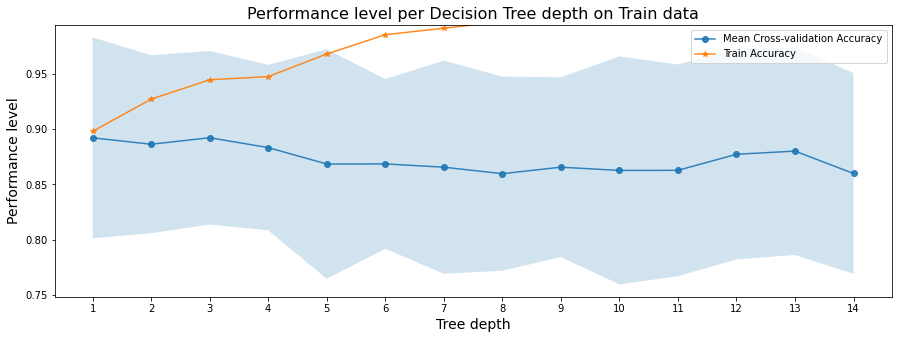

In [39]:
# function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X, y, tree_depths, cv=10, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(criterion='gini', max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
  
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='Mean Cross-validation Accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='Train Accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Performance level', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

# fitting trees of depth 1 to 15
sm_tree_depths = range(1,15)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(train_X0, train_Y0, sm_tree_depths)

# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Performance level per Decision Tree depth on Train data')

In [85]:
idx_max = sm_cv_scores_mean.argmax()
sm_best_tree_depth = sm_tree_depths[idx_max]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
print('The depth-{} tree achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      sm_best_tree_depth, round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))

The depth-3 tree achieves the best mean cross-validation accuracy 89.51261 +/- 4.36648% on training dataset


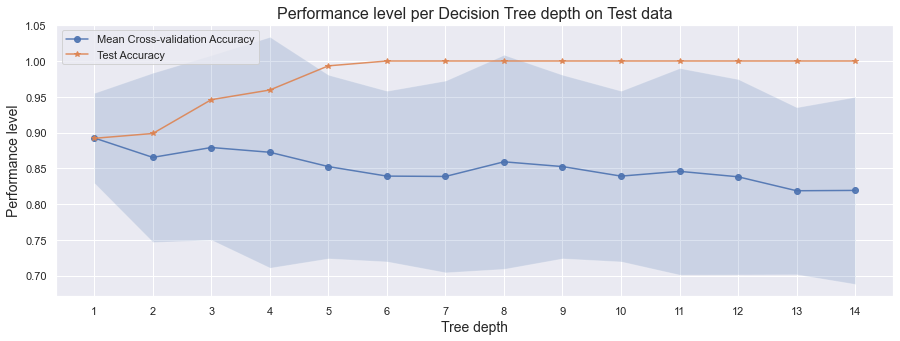

In [86]:
# function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X, y, tree_depths, cv=10, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(criterion='gini', max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
  
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='Mean Cross-validation Accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='Test Accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Performance level', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

# fitting trees of depth 1 to 15
sm_tree_depths = range(1,15)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(test_X0, test_Y0, sm_tree_depths)

# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Performance level per Decision Tree depth on Test data')

In [87]:
idx_max = sm_cv_scores_mean.argmax()
sm_best_tree_depth = sm_tree_depths[idx_max]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
print('The depth-{} tree achieves the best mean cross-validation accuracy {} +/- {}% on test dataset'.format(
      sm_best_tree_depth, round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))

The depth-1 tree achieves the best mean cross-validation accuracy 89.2381 +/- 3.15294% on test dataset


In [72]:
# define search space
space = dict()
space['criterion'] = ['gini', 'entropy']
space['max_depth'] = [3, 4, 6, 8]
space['max_features'] = ['sqrt', 'log2', 'auto']

dt0 = RandomForestClassifier(bootstrap = True, oob_score = True)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
dt_cv = GridSearchCV(dt0, space, cv=cv, scoring= 'roc_auc')
dt_cv.fit(train_X0, train_Y0)

# summarize result
print("Random Forest GridSearch score: "+str(dt_cv.best_score_))
print("Random Forest GridSearch params: ")
print(dt_cv.best_params_)

Random Forest GridSearch score: 0.9277240143369178
Random Forest GridSearch params: 
{'criterion': 'entropy', 'max_depth': 6, 'max_features': 'auto'}


In [50]:
# Fitting the decision tree
classification_tree2.fit(train_X0, train_Y0)

# Performance of the tree on the train data
train_tree_prediction0 = classification_tree2.predict(train_X0)

print("Decision tree performance on training data")

print('\nConfusion Matrix:')
print(confusion_matrix(train_Y0, train_tree_prediction0))

print('\nClassification Report:')
print(classification_report(train_Y0, train_tree_prediction0))

print('Accuracy Score on train data: {}'.format(classification_tree2.score(train_X0, train_Y0)))


# Performance of the tree on the test data
test_tree_prediction0 = classification_tree2.predict(test_X0)

print("\n\nDecision tree performance on test data")

print('\nConfusion Matrix:')
print(confusion_matrix(test_Y0, test_tree_prediction0))

print('\nClassification Report:')
print(classification_report(test_Y0, test_tree_prediction0))

print('\nAccuracy Score on test data: {}'. format(classification_tree2.score(test_X0, test_Y0)))

# ROC & AUC
auc0 = np.round(roc_auc_score(test_Y0, test_tree_prediction0), 3)
 
print("\nAUC for our sample data is {}". format(auc0))

recall_sensitivity = metrics.recall_score(test_Y0, test_tree_prediction0, pos_label=1)
recall_specificity = metrics.recall_score(test_Y0, test_tree_prediction0, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))


Decision tree performance on training data

Confusion Matrix:
[[301   2]
 [ 13  27]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       303
           1       0.93      0.68      0.78        40

    accuracy                           0.96       343
   macro avg       0.94      0.83      0.88       343
weighted avg       0.96      0.96      0.95       343

Accuracy Score on train data: 0.956268221574344


Decision tree performance on test data

Confusion Matrix:
[[127   5]
 [ 12   4]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       132
           1       0.44      0.25      0.32        16

    accuracy                           0.89       148
   macro avg       0.68      0.61      0.63       148
weighted avg       0.86      0.89      0.87       148


Accuracy Score on test data: 0.8851351351351351

AUC for our sample data is 0.606

#### Implementation on oversampled datasets

In [40]:
# Fitting the decision tree
classification_tree.fit(train_X1, train_Y1)

print("Decision tree performance on training data")
# Performance of the tree on the train data
train_tree_prediction1 = classification_tree.predict(train_X1)

print('Confusion Matrix:')
print(confusion_matrix(train_Y1, train_tree_prediction1))

print('\nClassification Report:')
print(classification_report(train_Y1, train_tree_prediction1))

print('Accuracy Score on train data:')
classification_tree.score(train_X1, train_Y1)

# Performance of the tree on the test data
test_tree_prediction1 = classification_tree.predict(test_X1)

print("\n\nDecision tree performance on test data")

print('Confusion Matrix:')
print(confusion_matrix(test_Y1, test_tree_prediction1))

print('\nClassification Report:')
print(classification_report(test_Y1, test_tree_prediction1))

print('Accuracy Score on test data:')
classification_tree.score(test_X1, test_Y1)

# ROC & AUC
auc1 = np.round(roc_auc_score(test_Y1, test_tree_prediction1), 3)
 
print("\nAUC for our sample data is {}". format(auc1))

recall_sensitivity = metrics.recall_score(test_Y1, test_tree_prediction1, pos_label=1)
recall_specificity = metrics.recall_score(test_Y1, test_tree_prediction1, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Decision tree performance on training data
Confusion Matrix:
[[298   0]
 [  0 311]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       298
           1       1.00      1.00      1.00       311

    accuracy                           1.00       609
   macro avg       1.00      1.00      1.00       609
weighted avg       1.00      1.00      1.00       609

Accuracy Score on train data:


Decision tree performance on test data
Confusion Matrix:
[[118  19]
 [ 15 109]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.87       137
           1       0.85      0.88      0.87       124

    accuracy                           0.87       261
   macro avg       0.87      0.87      0.87       261
weighted avg       0.87      0.87      0.87       261

Accuracy Score on test data:

AUC for our sample data is 0.87
Sensitivity Score on test data: 0.879032

In [42]:
# Fitting the decision tree
classification_tree2.fit(train_X1, train_Y1)

print("Decision tree performance on training data")
# Performance of the tree on the train data
train_tree_prediction1 = classification_tree2.predict(train_X1)

print('Confusion Matrix:')
print(confusion_matrix(train_Y1, train_tree_prediction1))

print('\nClassification Report:')
print(classification_report(train_Y1, train_tree_prediction1))

print('Accuracy Score on train data:')
classification_tree2.score(train_X1, train_Y1)

# Performance of the tree on the test data
test_tree_prediction1 = classification_tree2.predict(test_X1)

print("\n\nDecision tree performance on test data")

print('Confusion Matrix:')
print(confusion_matrix(test_Y1, test_tree_prediction1))

print('\nClassification Report:')
print(classification_report(test_Y1, test_tree_prediction1))

print('Accuracy Score on test data:')
classification_tree2.score(test_X1, test_Y1)

# ROC & AUC
auc1 = np.round(roc_auc_score(test_Y1, test_tree_prediction1), 3)
 
print("\nAUC for our sample data is {}". format(auc1))

recall_sensitivity = metrics.recall_score(test_Y1, test_tree_prediction1, pos_label=1)
recall_specificity = metrics.recall_score(test_Y1, test_tree_prediction1, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Decision tree performance on training data
Confusion Matrix:
[[272  26]
 [  8 303]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       298
           1       0.92      0.97      0.95       311

    accuracy                           0.94       609
   macro avg       0.95      0.94      0.94       609
weighted avg       0.95      0.94      0.94       609

Accuracy Score on train data:


Decision tree performance on test data
Confusion Matrix:
[[120  17]
 [  7 117]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91       137
           1       0.87      0.94      0.91       124

    accuracy                           0.91       261
   macro avg       0.91      0.91      0.91       261
weighted avg       0.91      0.91      0.91       261

Accuracy Score on test data:

AUC for our sample data is 0.91
Sensitivity Score on test data: 0.943548

In [43]:
# Fitting the decision tree
classification_tree.fit(train_X2, train_Y2)

# Performance of the tree on the train data
train_tree_prediction2 = classification_tree.predict(train_X2)

print("Decision tree performance on training data")

print('\nConfusion Matrix:')
print(confusion_matrix(train_Y2, train_tree_prediction2))

print('\nClassification Report:')
print(classification_report(train_Y2, train_tree_prediction2))

print('Accuracy Score on train data: {}'.format(classification_tree.score(train_X2, train_Y2)))


# Performance of the tree on the test data
test_tree_prediction2 = classification_tree.predict(test_X2)

print("\n\nDecision tree performance on test data")

print('\nConfusion Matrix:')
print(confusion_matrix(test_Y2, test_tree_prediction2))

print('\nClassification Report:')
print(classification_report(test_Y2, test_tree_prediction2))

print('Accuracy Score on test data: {}'. format(classification_tree.score(test_X2, test_Y2)))

# ROC & AUC
auc2 = np.round(roc_auc_score(test_Y2, test_tree_prediction2), 3)
 
print("\nAUC for our sample data is {}". format(auc2))

recall_sensitivity = metrics.recall_score(test_Y2, test_tree_prediction2, pos_label=1)
recall_specificity = metrics.recall_score(test_Y2, test_tree_prediction2, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Decision tree performance on training data

Confusion Matrix:
[[298   0]
 [  0 311]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       298
           1       1.00      1.00      1.00       311

    accuracy                           1.00       609
   macro avg       1.00      1.00      1.00       609
weighted avg       1.00      1.00      1.00       609

Accuracy Score on train data: 1.0


Decision tree performance on test data

Confusion Matrix:
[[117  20]
 [ 15 109]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       137
           1       0.84      0.88      0.86       124

    accuracy                           0.87       261
   macro avg       0.87      0.87      0.87       261
weighted avg       0.87      0.87      0.87       261

Accuracy Score on test data: 0.8659003831417624

AUC for our sample data is 0.867
Sensitivity Sc

In [44]:
# Fitting the decision tree
classification_tree3.fit(train_X2, train_Y2)

# Performance of the tree on the train data
train_tree_prediction2 = classification_tree3.predict(train_X2)

print("Decision tree performance on training data")

print('\nConfusion Matrix:')
print(confusion_matrix(train_Y2, train_tree_prediction2))

print('\nClassification Report:')
print(classification_report(train_Y2, train_tree_prediction2))

print('Accuracy Score on train data: {}'.format(classification_tree3.score(train_X2, train_Y2)))


# Performance of the tree on the test data
test_tree_prediction2 = classification_tree3.predict(test_X2)

print("\n\nDecision tree performance on test data")

print('\nConfusion Matrix:')
print(confusion_matrix(test_Y2, test_tree_prediction2))

print('\nClassification Report:')
print(classification_report(test_Y2, test_tree_prediction2))

print('Accuracy Score on test data: {}'. format(classification_tree3.score(test_X2, test_Y2)))

# ROC & AUC
auc2 = np.round(roc_auc_score(test_Y2, test_tree_prediction2), 3)
 
print("\nAUC for our sample data is {}". format(auc2))

recall_sensitivity = metrics.recall_score(test_Y2, test_tree_prediction2, pos_label=1)
recall_specificity = metrics.recall_score(test_Y2, test_tree_prediction2, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Decision tree performance on training data

Confusion Matrix:
[[274  24]
 [ 26 285]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       298
           1       0.92      0.92      0.92       311

    accuracy                           0.92       609
   macro avg       0.92      0.92      0.92       609
weighted avg       0.92      0.92      0.92       609

Accuracy Score on train data: 0.9178981937602627


Decision tree performance on test data

Confusion Matrix:
[[120  17]
 [ 13 111]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       137
           1       0.87      0.90      0.88       124

    accuracy                           0.89       261
   macro avg       0.88      0.89      0.88       261
weighted avg       0.89      0.89      0.89       261

Accuracy Score on test data: 0.8850574712643678

AUC for our sample data is 0.886

In [45]:
# Fitting the decision tree
classification_tree.fit(train_X3, train_Y3)

# Performance of the tree on the train data
train_tree_prediction3 = classification_tree.predict(train_X3)

print("Decision tree performance on training data")

print('\nConfusion Matrix:')
print(confusion_matrix(train_Y3, train_tree_prediction3))

print('\nClassification Report:')
print(classification_report(train_Y3, train_tree_prediction3))

print('Accuracy Score on train data: {}'.format(classification_tree.score(train_X3, train_Y3)))


# Performance of the tree on the test data
test_tree_prediction3 = classification_tree.predict(test_X3)

print("\n\nDecision tree performance on test data")

print('\nConfusion Matrix:')
print(confusion_matrix(test_Y3, test_tree_prediction3))

print('\nClassification Report:')
print(classification_report(test_Y3, test_tree_prediction3))

print('\nAccuracy Score on test data: {}'. format(classification_tree.score(test_X3, test_Y3)))

# ROC & AUC
auc3 = np.round(roc_auc_score(test_Y3, test_tree_prediction3), 3)
 
print("\nAUC for our sample data is {}". format(auc3))

recall_sensitivity = metrics.recall_score(test_Y3, test_tree_prediction3, pos_label=1)
recall_specificity = metrics.recall_score(test_Y3, test_tree_prediction3, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Decision tree performance on training data

Confusion Matrix:
[[298   0]
 [  0 311]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       298
           1       1.00      1.00      1.00       311

    accuracy                           1.00       609
   macro avg       1.00      1.00      1.00       609
weighted avg       1.00      1.00      1.00       609

Accuracy Score on train data: 1.0


Decision tree performance on test data

Confusion Matrix:
[[123  14]
 [ 15 109]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.90      0.89       137
           1       0.89      0.88      0.88       124

    accuracy                           0.89       261
   macro avg       0.89      0.89      0.89       261
weighted avg       0.89      0.89      0.89       261


Accuracy Score on test data: 0.8888888888888888

AUC for our sample data is 0.888
Sensitivity S

In [46]:
# Fitting the decision tree
classification_tree1.fit(train_X3, train_Y3)

# Performance of the tree on the train data
train_tree_prediction3 = classification_tree1.predict(train_X3)

print("Decision tree performance on training data")

print('\nConfusion Matrix:')
print(confusion_matrix(train_Y3, train_tree_prediction3))

print('\nClassification Report:')
print(classification_report(train_Y3, train_tree_prediction3))

print('Accuracy Score on train data: {}'.format(classification_tree1.score(train_X3, train_Y3)))


# Performance of the tree on the test data
test_tree_prediction3 = classification_tree1.predict(test_X3)

print("\n\nDecision tree performance on test data")

print('\nConfusion Matrix:')
print(confusion_matrix(test_Y3, test_tree_prediction3))

print('\nClassification Report:')
print(classification_report(test_Y3, test_tree_prediction3))

print('\nAccuracy Score on test data: {}'. format(classification_tree1.score(test_X3, test_Y3)))

# ROC & AUC
auc3 = np.round(roc_auc_score(test_Y3, test_tree_prediction3), 3)
 
print("\nAUC for our sample data is {}". format(auc3))

recall_sensitivity = metrics.recall_score(test_Y3, test_tree_prediction3, pos_label=1)
recall_specificity = metrics.recall_score(test_Y3, test_tree_prediction3, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Decision tree performance on training data

Confusion Matrix:
[[260  38]
 [  9 302]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.87      0.92       298
           1       0.89      0.97      0.93       311

    accuracy                           0.92       609
   macro avg       0.93      0.92      0.92       609
weighted avg       0.93      0.92      0.92       609

Accuracy Score on train data: 0.922824302134647


Decision tree performance on test data

Confusion Matrix:
[[107  30]
 [ 11 113]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.78      0.84       137
           1       0.79      0.91      0.85       124

    accuracy                           0.84       261
   macro avg       0.85      0.85      0.84       261
weighted avg       0.85      0.84      0.84       261


Accuracy Score on test data: 0.842911877394636

AUC for our sample data is 0.846


#### Implementation on undersampled datasets

In [47]:
# Fitting the decision tree
classification_tree.fit(train_X4, train_Y4)

# Performance of the tree on the train data
train_tree_prediction4 = classification_tree.predict(train_X4)

print("Decision tree performance on training data")

print('\nConfusion Matrix:')
print(confusion_matrix(train_Y4, train_tree_prediction4))

print('\nClassification Report:')
print(classification_report(train_Y4, train_tree_prediction4))

print('Accuracy Score on train data: {}'.format(classification_tree.score(train_X4, train_Y4)))


# Performance of the tree on the test data
test_tree_prediction4 = classification_tree.predict(test_X4)

print("\n\nDecision tree performance on test data")

print('\nConfusion Matrix:')
print(confusion_matrix(test_Y4, test_tree_prediction4))

print('\nClassification Report:')
print(classification_report(test_Y4, test_tree_prediction4))

print('\nAccuracy Score on test data: {}'. format(classification_tree.score(test_X4, test_Y4)))

# ROC & AUC
auc4 = np.round(roc_auc_score(test_Y4, test_tree_prediction4), 3)
 
print("\nAUC for our sample data is {}". format(auc4))

recall_sensitivity = metrics.recall_score(test_Y4, test_tree_prediction4, pos_label=1)
recall_specificity = metrics.recall_score(test_Y4, test_tree_prediction4, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Decision tree performance on training data

Confusion Matrix:
[[292   0]
 [  0  41]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       292
           1       1.00      1.00      1.00        41

    accuracy                           1.00       333
   macro avg       1.00      1.00      1.00       333
weighted avg       1.00      1.00      1.00       333

Accuracy Score on train data: 1.0


Decision tree performance on test data

Confusion Matrix:
[[122   6]
 [  7   8]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       128
           1       0.57      0.53      0.55        15

    accuracy                           0.91       143
   macro avg       0.76      0.74      0.75       143
weighted avg       0.91      0.91      0.91       143


Accuracy Score on test data: 0.9090909090909091

AUC for our sample data is 0.743
Sensitivity S

In [51]:
# Fitting the decision tree
classification_tree2.fit(train_X4, train_Y4)

# Performance of the tree on the train data
train_tree_prediction4 = classification_tree2.predict(train_X4)

print("Decision tree performance on training data")

print('\nConfusion Matrix:')
print(confusion_matrix(train_Y4, train_tree_prediction4))

print('\nClassification Report:')
print(classification_report(train_Y4, train_tree_prediction4))

print('Accuracy Score on train data: {}'.format(classification_tree2.score(train_X4, train_Y4)))


# Performance of the tree on the test data
test_tree_prediction4 = classification_tree2.predict(test_X4)

print("\n\nDecision tree performance on test data")

print('\nConfusion Matrix:')
print(confusion_matrix(test_Y4, test_tree_prediction4))

print('\nClassification Report:')
print(classification_report(test_Y4, test_tree_prediction4))

print('\nAccuracy Score on test data: {}'. format(classification_tree2.score(test_X4, test_Y4)))

# ROC & AUC
auc4 = np.round(roc_auc_score(test_Y4, test_tree_prediction4), 3)
 
print("\nAUC for our sample data is {}". format(auc4))

recall_sensitivity = metrics.recall_score(test_Y4, test_tree_prediction4, pos_label=1)
recall_specificity = metrics.recall_score(test_Y4, test_tree_prediction4, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Decision tree performance on training data

Confusion Matrix:
[[292   0]
 [ 15  26]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       292
           1       1.00      0.63      0.78        41

    accuracy                           0.95       333
   macro avg       0.98      0.82      0.88       333
weighted avg       0.96      0.95      0.95       333

Accuracy Score on train data: 0.954954954954955


Decision tree performance on test data

Confusion Matrix:
[[124   4]
 [  9   6]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       128
           1       0.60      0.40      0.48        15

    accuracy                           0.91       143
   macro avg       0.77      0.68      0.72       143
weighted avg       0.90      0.91      0.90       143


Accuracy Score on test data: 0.9090909090909091

AUC for our sample data is 0.684

In [54]:
# Fitting the decision tree
classification_tree.fit(train_X5, train_Y5)

# Performance of the tree on the train data
train_tree_prediction5 = classification_tree.predict(train_X5)

print("Decision tree performance on training data")

print('\nConfusion Matrix:')
print(confusion_matrix(train_Y5, train_tree_prediction5))

print('\nClassification Report:')
print(classification_report(train_Y5, train_tree_prediction5))

print('Accuracy Score on train data: {}'.format(classification_tree.score(train_X5, train_Y5)))


# Performance of the tree on the test data
test_tree_prediction5 = classification_tree.predict(test_X5)

print("\n\nDecision tree performance on test data")

print('\nConfusion Matrix:')
print(confusion_matrix(test_Y5, test_tree_prediction5))

print('\nClassification Report:')
print(classification_report(test_Y5, test_tree_prediction5))

print('\nAccuracy Score on test data: {}'. format(classification_tree.score(test_X5, test_Y5)))

# ROC & AUC
auc5 = np.round(roc_auc_score(test_Y5, test_tree_prediction5), 3)
 
print("\nAUC for our sample data is {}". format(auc5))

recall_sensitivity = metrics.recall_score(test_Y5, test_tree_prediction5, pos_label=1)
recall_specificity = metrics.recall_score(test_Y5, test_tree_prediction5, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Decision tree performance on training data

Confusion Matrix:
[[292   0]
 [  0  41]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       292
           1       1.00      1.00      1.00        41

    accuracy                           1.00       333
   macro avg       1.00      1.00      1.00       333
weighted avg       1.00      1.00      1.00       333

Accuracy Score on train data: 1.0


Decision tree performance on test data

Confusion Matrix:
[[123   5]
 [  6   9]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       128
           1       0.64      0.60      0.62        15

    accuracy                           0.92       143
   macro avg       0.80      0.78      0.79       143
weighted avg       0.92      0.92      0.92       143


Accuracy Score on test data: 0.9230769230769231

AUC for our sample data is 0.78
Sensitivity Sc

In [49]:
# Fitting the decision tree
classification_tree.fit(train_X6, train_Y6)

# Performance of the tree on the train data
train_tree_prediction6 = classification_tree.predict(train_X6)

print("Decision tree performance on training data")

print('\nConfusion Matrix:')
print(confusion_matrix(train_Y6, train_tree_prediction6))

print('\nClassification Report:')
print(classification_report(train_Y6, train_tree_prediction6))

print('Accuracy Score on train data: {}'.format(classification_tree.score(train_X6, train_Y6)))


# Performance of the tree on the test data
train_tree_prediction6 = classification_tree.predict(test_X6)

print("\n\nDecision tree performance on test data")

print('\nConfusion Matrix:')
print(confusion_matrix(test_Y6, train_tree_prediction6))

print('\nClassification Report:')
print(classification_report(test_Y6, train_tree_prediction6))

print('\nAccuracy Score on test data: {}'. format(classification_tree.score(test_X6, test_Y6)))

# ROC & AUC
auc6 = np.round(roc_auc_score(test_Y6, train_tree_prediction6), 3)
 
print("\nAUC for our sample data is {}". format(auc6))

recall_sensitivity = metrics.recall_score(test_Y6, train_tree_prediction6, pos_label=1)
recall_specificity = metrics.recall_score(test_Y6, train_tree_prediction6, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Decision tree performance on training data

Confusion Matrix:
[[292   0]
 [  0  41]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       292
           1       1.00      1.00      1.00        41

    accuracy                           1.00       333
   macro avg       1.00      1.00      1.00       333
weighted avg       1.00      1.00      1.00       333

Accuracy Score on train data: 1.0


Decision tree performance on test data

Confusion Matrix:
[[121   7]
 [  6   9]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       128
           1       0.56      0.60      0.58        15

    accuracy                           0.91       143
   macro avg       0.76      0.77      0.76       143
weighted avg       0.91      0.91      0.91       143


Accuracy Score on test data: 0.9090909090909091

AUC for our sample data is 0.773
Sensitivity S

### Performance of Algorithm

Unsampled data has poor performance, and the undersampled data has a poor although improved performance. The oversampled data is far more improved with an F1 Score of 86-89% on the train and test sets and an AUC between 86-89%.

Trail; to improve algorithm performance using parameter optimization through grid search.

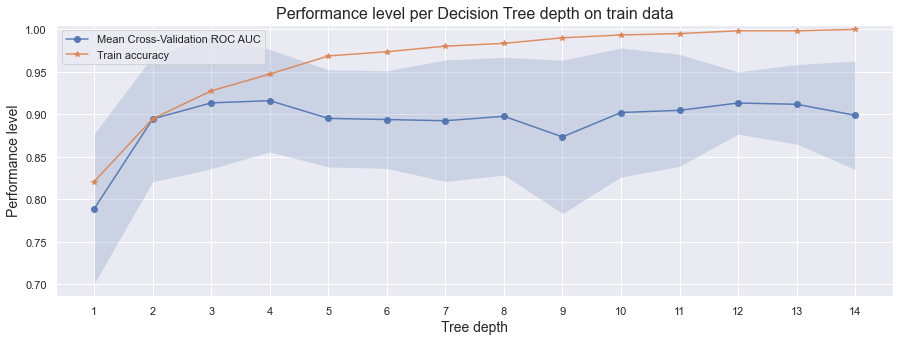

In [105]:
# function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X, y, tree_depths, cv=10, scoring='roc_auc'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(criterion='gini', max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
  
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='Mean Cross-Validation ROC AUC', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='Train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Performance level', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

# fitting trees of depth 1 to 15
sm_tree_depths = range(1,15)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(train_X1, train_Y1, sm_tree_depths)

# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Performance level per Decision Tree depth on train data')

In [106]:
idx_max = sm_cv_scores_mean.argmax()
sm_best_tree_depth = sm_tree_depths[idx_max]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
print('The depth-{} tree achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      sm_best_tree_depth, round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))

The depth-4 tree achieves the best mean cross-validation accuracy 91.61889 +/- 3.02523% on training dataset


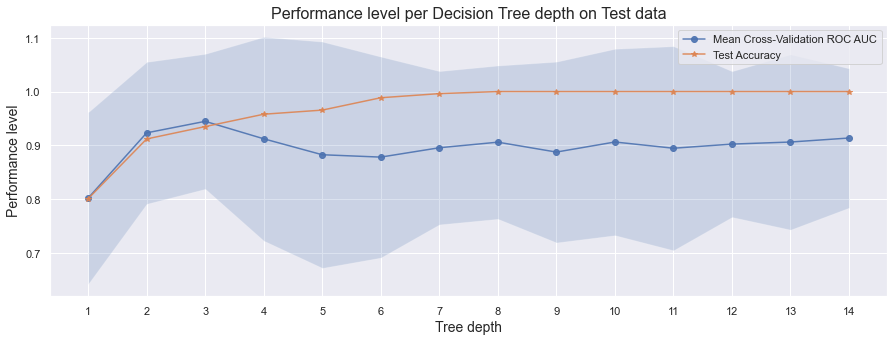

In [109]:
# function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X, y, tree_depths, cv=10, scoring='roc_auc'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(criterion='gini', max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
  
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='Mean Cross-Validation ROC AUC', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='Test Accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Performance level', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

# fitting trees of depth 1 to 15
sm_tree_depths = range(1,15)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(test_X2, test_Y2, sm_tree_depths)

# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Performance level per Decision Tree depth on Test data')

In [110]:
idx_max = sm_cv_scores_mean.argmax()
sm_best_tree_depth = sm_tree_depths[idx_max]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
print('The depth-{} tree achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      sm_best_tree_depth, round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))

The depth-3 tree achieves the best mean cross-validation accuracy 94.46217 +/- 6.27988% on training dataset


In [118]:
# function for training and evaluating a tree
def run_single_tree(X_train, y_train, X_test, y_test, depth):
    model = DecisionTreeClassifier(criterion='gini', max_depth=depth).fit(X_train, y_train)
    accuracy_train = model.score(X_train, y_train)
    accuracy_test = model.score(X_test, y_test)
    print('Single tree depth: ', depth)
    print('Accuracy, Train Set: ', round(accuracy_train*100,5), '%')
    print('Accuracy, Test Set: ', round(accuracy_test*100,5), '%')
    return accuracy_train, accuracy_test
  

# train and evaluate a 4-depth tree
sm_best_tree_accuracy_train, sm_best_tree_accuracy_test = run_single_tree(train_X0, train_Y0, 
                                                                          test_X0, test_Y0, 
                                                                          sm_best_tree_depth)

Single tree depth:  3
Accuracy, Train Set:  94.46064 %
Accuracy, Test Set:  86.48649 %


##### Using the gini index crfiterion;


Optimum tree depth: 3

Accuracy, Train Set:  94.46064 %

Accuracy, Test Set:  86.48649 %



##### Using entropy criterion;



Optimum tree depth:3

Accuracy, Train Set:  93.29446 %

Accuracy, Test Set:  88.51351 %


In [121]:
## Grid search

# define search space
space = dict()
space['criterion'] = ['gini', 'entropy']
space['max_depth'] = [2,4,6,8,10,12]
space['max_features'] = ['auto', 'sqrt', 'log2']
space['ccp_alpha'] = [0.1, .01, .001]

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
dt_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), space, cv=cv, scoring= 'roc_auc')
dt_cv.fit(train_X1, train_Y1)

# summarize result
print("Decision tree classifier GridSearch score: "+str(dt_cv.best_score_))
print("Decision tree classifier GridSearch params: ")
print(dt_cv.best_params_)

Decision tree classifier GridSearch score: 0.9424200500556172
Decision tree classifier GridSearch params: 
{'ccp_alpha': 0.01, 'criterion': 'entropy', 'max_depth': 4, 'max_features': 'auto'}


## ALGORITHM: Random Forest

In [67]:
random_forest = RandomForestClassifier(n_estimators = 100, bootstrap=True, 
                                       oob_score=True,random_state=1) 

In [ ]:
## Grid search

# define search space

space = dict()
space['n_estimators'] = [50, 100, 150, 200]
space['criterion'] = ['gini', 'entropy']
space['max_depth'] = [2,4,6,8,10,12]
space['max_features'] = ['sqrt', 'log2', None]
space['ccp_alpha'] = [0.1, .01, .001]


cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
rfc_cv = GridSearchCV(RandomForestClassifier(n_estimators = 100, bootstrap=True, 
                                       oob_score=True,n_jobs = -1, random_state=1), space, cv=cv, scoring= 'roc_auc')
rfc_cv.fit(train_X1, train_Y1)

# summarize result
print("Decision tree classifier GridSearch score: "+str(rfc_cv.best_score_))
print("Decision tree classifier GridSearch params: ")
print(dt_cv.best_params_)

#### Implementation on unsampled data

In [56]:
# Fitting the random forest
random_forest.fit(train_X0, train_Y0)

# Performance of the tree on the train data
train_rf_prediction0 = random_forest.predict(train_X0)

print("Random Forest Classifier  performance on training data")

print('\nConfusion Matrix:')
print(confusion_matrix(train_Y0, train_rf_prediction0))

print('\nClassification Report:')
print(classification_report(train_Y0, train_rf_prediction0))

print('Accuracy Score on train data: {}'.format(random_forest.score(train_X0, train_Y0)))
print('Out of bag (OOB) Score on train data: {}'.format(random_forest.oob_score_))


# Performance of the tree on the test data
test_rf_prediction0 = random_forest.predict(test_X0)

print("\n\nRandom Forest Classifier performance on test data")

print('\nConfusion Matrix:')
print(confusion_matrix(test_Y0, test_rf_prediction0))

print('\nClassification Report:')
print(classification_report(test_Y0, test_rf_prediction0))

print('Accuracy Score on test data: {}'. format(random_forest.score(test_X0, test_Y0)))

# ROC & AUC
rf_auc0 = np.round(roc_auc_score(test_Y0, test_rf_prediction0), 3)
 
print("\nAUC for our sample data is {}". format(rf_auc0))

recall_sensitivity = metrics.recall_score(test_Y0, test_rf_prediction0, pos_label=1)
recall_specificity = metrics.recall_score(test_Y0, test_rf_prediction0, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Random Forest Classifier  performance on training data

Confusion Matrix:
[[303   0]
 [  0  40]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       303
           1       1.00      1.00      1.00        40

    accuracy                           1.00       343
   macro avg       1.00      1.00      1.00       343
weighted avg       1.00      1.00      1.00       343

Accuracy Score on train data: 1.0
Out of bag (OOB) Score on train data: 0.9183673469387755


Random Forest Classifier performance on test data

Confusion Matrix:
[[128   4]
 [ 12   4]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       132
           1       0.50      0.25      0.33        16

    accuracy                           0.89       148
   macro avg       0.71      0.61      0.64       148
weighted avg       0.87      0.89      0.88       148

Accuracy Score o

#### Implementation on oversampled datasets

In [57]:
# Fitting the random forest
random_forest.fit(train_X1, train_Y1)

print("Decision tree performance on training data")
# Performance of the tree on the train data
train_rf_prediction1 = random_forest.predict(train_X1)

print('Confusion Matrix:')
print(confusion_matrix(train_Y1, train_rf_prediction1))

print('\nClassification Report:')
print(classification_report(train_Y1, train_rf_prediction1))

print('Accuracy Score on train data:', random_forest.score(train_X1, train_Y1))
print('Out of bag (OOB) Score on train data: {}'.format(random_forest.oob_score_))


# Performance of the tree on the test data
test_rf_prediction1 = random_forest.predict(test_X1)

print("\n\nDecision tree performance on test data")

print('Confusion Matrix:')
print(confusion_matrix(test_Y1, test_rf_prediction1))

print('\nClassification Report:')
print(classification_report(test_Y1, test_rf_prediction1))

print('Accuracy Score on test data:', random_forest.score(test_X1, test_Y1))


# ROC & AUC
rf_auc1 = np.round(roc_auc_score(test_Y1, test_rf_prediction1), 3)
 
print("\nAUC for our sample data is {}". format(rf_auc1))

recall_sensitivity = metrics.recall_score(test_Y1, test_rf_prediction1, pos_label=1)
recall_specificity = metrics.recall_score(test_Y1, test_rf_prediction1, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Decision tree performance on training data
Confusion Matrix:
[[298   0]
 [  0 311]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       298
           1       1.00      1.00      1.00       311

    accuracy                           1.00       609
   macro avg       1.00      1.00      1.00       609
weighted avg       1.00      1.00      1.00       609

Accuracy Score on train data: 1.0
Out of bag (OOB) Score on train data: 0.9425287356321839


Decision tree performance on test data
Confusion Matrix:
[[132   5]
 [  3 121]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       137
           1       0.96      0.98      0.97       124

    accuracy                           0.97       261
   macro avg       0.97      0.97      0.97       261
weighted avg       0.97      0.97      0.97       261

Accuracy Score on test data: 0.9693486590

In [58]:
# Fitting the random forest
random_forest.fit(train_X2, train_Y2)

print("Decision tree performance on training data")
# Performance of the tree on the train data
train_rf_prediction2 = random_forest.predict(train_X2)

print('Confusion Matrix:')
print(confusion_matrix(train_Y2, train_rf_prediction2))

print('\nClassification Report:')
print(classification_report(train_Y2, train_rf_prediction2))

print('Accuracy Score on train data:', random_forest.score(train_X2, train_Y2))
print('Out of bag (OOB) Score on train data: {}'.format(random_forest.oob_score_))


# Performance of the tree on the test data
test_rf_prediction2 = random_forest.predict(test_X2)

print("\n\nDecision tree performance on test data")

print('Confusion Matrix:')
print(confusion_matrix(test_Y2, test_rf_prediction2))

print('\nClassification Report:')
print(classification_report(test_Y2, test_rf_prediction2))

print('Accuracy Score on test data:', random_forest.score(test_X2, test_Y2))


# ROC & AUC
rf_auc2 = np.round(roc_auc_score(test_Y2, test_rf_prediction2), 3)
 
print("\nAUC for our sample data is {}". format(rf_auc2))

recall_sensitivity = metrics.recall_score(test_Y2, test_rf_prediction2, pos_label=1)
recall_specificity = metrics.recall_score(test_Y2, test_rf_prediction2, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Decision tree performance on training data
Confusion Matrix:
[[298   0]
 [  0 311]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       298
           1       1.00      1.00      1.00       311

    accuracy                           1.00       609
   macro avg       1.00      1.00      1.00       609
weighted avg       1.00      1.00      1.00       609

Accuracy Score on train data: 1.0
Out of bag (OOB) Score on train data: 0.9293924466338259


Decision tree performance on test data
Confusion Matrix:
[[130   7]
 [  5 119]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       137
           1       0.94      0.96      0.95       124

    accuracy                           0.95       261
   macro avg       0.95      0.95      0.95       261
weighted avg       0.95      0.95      0.95       261

Accuracy Score on test data: 0.9540229885

In [59]:
# Fitting the random forest
random_forest.fit(train_X3, train_Y3)

print("Decision tree performance on training data")
# Performance of the tree on the train data
train_rf_prediction3 = random_forest.predict(train_X3)

print('Confusion Matrix:')
print(confusion_matrix(train_Y3, train_rf_prediction3))

print('\nClassification Report:')
print(classification_report(train_Y3, train_rf_prediction3))

print('Accuracy Score on train data:', random_forest.score(train_X3, train_Y3))
print('Out of bag (OOB) Score on train data: {}'.format(random_forest.oob_score_))


# Performance of the tree on the test data
test_rf_prediction3 = random_forest.predict(test_X3)

print("\n\nDecision tree performance on test data")

print('Confusion Matrix:')
print(confusion_matrix(test_Y3, test_rf_prediction3))

print('\nClassification Report:')
print(classification_report(test_Y3, test_rf_prediction3))

print('Accuracy Score on test data:', random_forest.score(test_X3, test_Y3))


# ROC & AUC
rf_auc3 = np.round(roc_auc_score(test_Y3, test_rf_prediction3), 3)
 
print("\nAUC for our sample data is {}". format(rf_auc3))

recall_sensitivity = metrics.recall_score(test_Y3, test_rf_prediction3, pos_label=1)
recall_specificity = metrics.recall_score(test_Y3, test_rf_prediction3, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Decision tree performance on training data
Confusion Matrix:
[[298   0]
 [  0 311]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       298
           1       1.00      1.00      1.00       311

    accuracy                           1.00       609
   macro avg       1.00      1.00      1.00       609
weighted avg       1.00      1.00      1.00       609

Accuracy Score on train data: 1.0
Out of bag (OOB) Score on train data: 0.9376026272577996


Decision tree performance on test data
Confusion Matrix:
[[133   4]
 [  4 120]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       137
           1       0.97      0.97      0.97       124

    accuracy                           0.97       261
   macro avg       0.97      0.97      0.97       261
weighted avg       0.97      0.97      0.97       261

Accuracy Score on test data: 0.9693486590

#### Implementation on undersampled datasets

In [60]:
# Fitting the random forest
random_forest.fit(train_X4, train_Y4)

print("Decision tree performance on training data")
# Performance of the tree on the train data
train_rf_prediction4 = random_forest.predict(train_X4)

print('Confusion Matrix:')
print(confusion_matrix(train_Y4, train_rf_prediction4))

print('\nClassification Report:')
print(classification_report(train_Y4, train_rf_prediction4))

print('Accuracy Score on train data:', random_forest.score(train_X4, train_Y4))
print('Out of bag (OOB) Score on train data: {}'.format(random_forest.oob_score_))


# Performance of the tree on the test data
test_rf_prediction4 = random_forest.predict(test_X4)

print("\n\nDecision tree performance on test data")

print('Confusion Matrix:')
print(confusion_matrix(test_Y4, test_rf_prediction4))

print('\nClassification Report:')
print(classification_report(test_Y4, test_rf_prediction4))

print('Accuracy Score on test data:', random_forest.score(test_X4, test_Y4))


# ROC & AUC
rf_auc4 = np.round(roc_auc_score(test_Y4, test_rf_prediction4), 3)
 
print("\nAUC for our sample data is {}". format(rf_auc4))

recall_sensitivity = metrics.recall_score(test_Y4, test_rf_prediction4, pos_label=1)
recall_specificity = metrics.recall_score(test_Y4, test_rf_prediction4, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Decision tree performance on training data
Confusion Matrix:
[[292   0]
 [  0  41]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       292
           1       1.00      1.00      1.00        41

    accuracy                           1.00       333
   macro avg       1.00      1.00      1.00       333
weighted avg       1.00      1.00      1.00       333

Accuracy Score on train data: 1.0
Out of bag (OOB) Score on train data: 0.924924924924925


Decision tree performance on test data
Confusion Matrix:
[[126   2]
 [  8   7]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       128
           1       0.78      0.47      0.58        15

    accuracy                           0.93       143
   macro avg       0.86      0.73      0.77       143
weighted avg       0.92      0.93      0.92       143

Accuracy Score on test data: 0.93006993006

In [61]:
## Grid search

# define search space

space = dict()
space['n_estimators'] = [50, 100, 150, 200]
space['criterion'] = ['gini', 'entropy']
space['max_depth'] = [2,4,6,8,10,12]
space['max_features'] = ['sqrt', 'log2', None]
space['ccp_alpha'] = [0.1, .01, .001]


cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
rfc_cv = GridSearchCV(RandomForestClassifier(n_estimators = 100, bootstrap=True, 
                                       oob_score=True,n_jobs = -1, random_state=1), space, cv=cv, scoring= 'roc_auc')
rfc_cv.fit(train_X4, train_Y4)




random forest classifier GridSearch score: 0.9172351559625084
random forest classifier GridSearch params: 


NameError: name 'dt_cv' is not defined

In [62]:
# summarize result
print("random forest classifier GridSearch score: "+str(rfc_cv.best_score_))
print("random forest classifier GridSearch params: ")
print(rfc_cv.best_params_)

random forest classifier GridSearch score: 0.9172351559625084
random forest classifier GridSearch params: 
{'ccp_alpha': 0.01, 'criterion': 'entropy', 'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 100}


In [63]:
random_forest = RandomForestClassifier(n_estimators = 100,ccp_alpha = 0.01, criterion ='entropy', max_depth = 6, max_features = 'sqrt', 
                                        bootstrap=True, oob_score=True,n_jobs = -1, random_state=1)

In [64]:
# Fitting the random forest
random_forest.fit(train_X4, train_Y4)

print("Decision tree performance on training data")
# Performance of the tree on the train data
train_rf_prediction4 = random_forest.predict(train_X4)

print('Confusion Matrix:')
print(confusion_matrix(train_Y4, train_rf_prediction4))

print('\nClassification Report:')
print(classification_report(train_Y4, train_rf_prediction4))

print('Accuracy Score on train data:', random_forest.score(train_X4, train_Y4))
print('Out of bag (OOB) Score on train data: {}'.format(random_forest.oob_score_))


# Performance of the tree on the test data
test_rf_prediction4 = random_forest.predict(test_X4)

print("\n\nDecision tree performance on test data")

print('Confusion Matrix:')
print(confusion_matrix(test_Y4, test_rf_prediction4))

print('\nClassification Report:')
print(classification_report(test_Y4, test_rf_prediction4))

print('Accuracy Score on test data:', random_forest.score(test_X4, test_Y4))


# ROC & AUC
rf_auc4 = np.round(roc_auc_score(test_Y4, test_rf_prediction4), 3)
 
print("\nAUC for our sample data is {}". format(rf_auc4))

recall_sensitivity = metrics.recall_score(test_Y4, test_rf_prediction4, pos_label=1)
recall_specificity = metrics.recall_score(test_Y4, test_rf_prediction4, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Decision tree performance on training data
Confusion Matrix:
[[292   0]
 [  9  32]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       292
           1       1.00      0.78      0.88        41

    accuracy                           0.97       333
   macro avg       0.99      0.89      0.93       333
weighted avg       0.97      0.97      0.97       333

Accuracy Score on train data: 0.972972972972973
Out of bag (OOB) Score on train data: 0.9069069069069069


Decision tree performance on test data
Confusion Matrix:
[[126   2]
 [  7   8]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       128
           1       0.80      0.53      0.64        15

    accuracy                           0.94       143
   macro avg       0.87      0.76      0.80       143
weighted avg       0.93      0.94      0.93       143

Accuracy Score on test data

In [68]:
# Fitting the random forest
random_forest.fit(train_X5, train_Y5)

print("Decision tree performance on training data")
# Performance of the tree on the train data
train_rf_prediction5 = random_forest.predict(train_X5)

print('Confusion Matrix:')
print(confusion_matrix(train_Y5, train_rf_prediction5))

print('\nClassification Report:')
print(classification_report(train_Y5, train_rf_prediction5))

print('Accuracy Score on train data:', random_forest.score(train_X5, train_Y5))
print('Out of bag (OOB) Score on train data: {}'.format(random_forest.oob_score_))


# Performance of the tree on the test data
test_rf_prediction5 = random_forest.predict(test_X5)

print("\n\nDecision tree performance on test data")

print('Confusion Matrix:')
print(confusion_matrix(test_Y5, test_rf_prediction5))

print('\nClassification Report:')
print(classification_report(test_Y5, test_rf_prediction5))

print('Accuracy Score on test data:', random_forest.score(test_X5, test_Y5))


# ROC & AUC
rf_auc5 = np.round(roc_auc_score(test_Y5, test_rf_prediction5), 3)
 
print("\nAUC for our sample data is {}". format(rf_auc5))

recall_sensitivity = metrics.recall_score(test_Y5, test_rf_prediction5, pos_label=1)
recall_specificity = metrics.recall_score(test_Y5, test_rf_prediction5, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Decision tree performance on training data
Confusion Matrix:
[[292   0]
 [  0  41]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       292
           1       1.00      1.00      1.00        41

    accuracy                           1.00       333
   macro avg       1.00      1.00      1.00       333
weighted avg       1.00      1.00      1.00       333

Accuracy Score on train data: 1.0
Out of bag (OOB) Score on train data: 0.9219219219219219


Decision tree performance on test data
Confusion Matrix:
[[125   3]
 [  7   8]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       128
           1       0.73      0.53      0.62        15

    accuracy                           0.93       143
   macro avg       0.84      0.75      0.79       143
weighted avg       0.92      0.93      0.93       143

Accuracy Score on test data: 0.9300699300

In [70]:
# Fitting the random forest
random_forest.fit(train_X6, train_Y6)

print("Decision tree performance on training data")
# Performance of the tree on the train data
train_rf_prediction6 = random_forest.predict(train_X6)

print('Confusion Matrix:')
print(confusion_matrix(train_Y6, train_rf_prediction6))

print('\nClassification Report:')
print(classification_report(train_Y6, train_rf_prediction6))

print('Accuracy Score on train data:', random_forest.score(train_X6, train_Y6))
print('Out of bag (OOB) Score on train data: {}'.format(random_forest.oob_score_))


# Performance of the tree on the test data
test_rf_prediction6 = random_forest.predict(test_X6)

print("\n\nDecision tree performance on test data")

print('Confusion Matrix:')
print(confusion_matrix(test_Y6, test_rf_prediction6))

print('\nClassification Report:')
print(classification_report(test_Y6, test_rf_prediction6))

print('Accuracy Score on test data:', random_forest.score(test_X6, test_Y6))


# ROC & AUC
rf_auc6 = np.round(roc_auc_score(test_Y6, test_rf_prediction6), 3)
 
print("\nAUC for our sample data is {}". format(rf_auc6))

recall_sensitivity = metrics.recall_score(test_Y6, test_rf_prediction6, pos_label=1)
recall_specificity = metrics.recall_score(test_Y6, test_rf_prediction6, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Decision tree performance on training data
Confusion Matrix:
[[292   0]
 [  0  41]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       292
           1       1.00      1.00      1.00        41

    accuracy                           1.00       333
   macro avg       1.00      1.00      1.00       333
weighted avg       1.00      1.00      1.00       333

Accuracy Score on train data: 1.0
Out of bag (OOB) Score on train data: 0.9099099099099099


Decision tree performance on test data
Confusion Matrix:
[[126   2]
 [  8   7]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       128
           1       0.78      0.47      0.58        15

    accuracy                           0.93       143
   macro avg       0.86      0.73      0.77       143
weighted avg       0.92      0.93      0.92       143

Accuracy Score on test data: 0.9300699300

## ALGORITHM: K-nearest neighbour

#### Implementation on unsampled datasets

In [71]:
# Normalize the data for knn implementation

# returns a numpy array of the dataframe
x_train_k0 = train_X0.values
x_test_k0 = test_X0.values

min_max_scaler = preprocessing.MinMaxScaler()

# scale features
x_train_knorm0 = min_max_scaler.fit_transform(x_train_k0)
x_test_knorm0 = min_max_scaler.fit_transform(x_test_k0)


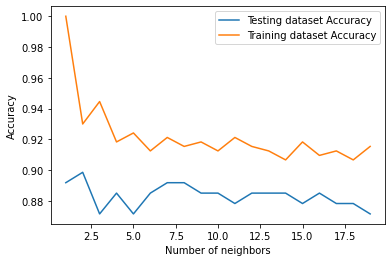

In [72]:
neighbors = np.arange(1, 20)
knn_train_accuracy = np.empty(len(neighbors))
knn_test_accuracy = np.empty(len(neighbors))
 
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_knorm0, train_Y0)
     
    # Compute training and test data accuracy
    knn_train_accuracy[i] = knn.score(x_train_knorm0, train_Y0)
    knn_test_accuracy[i] = knn.score(x_test_knorm0, test_Y0)
 
# Generate plot
plt.plot(neighbors, knn_test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, knn_train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [73]:
# optimum value of k = 7

knn_7 = KNeighborsClassifier(n_neighbors=7)
 
knn_7.fit(x_train_knorm0, train_Y0)

# Predict on data which model has seen before
knn_predict_train_0 = knn_7.predict(x_train_knorm0)

print('Confusion Matrix for Train data:')
print(confusion_matrix(train_Y0, knn_predict_train_0))
print('\nClassification Report')
print(classification_report(train_Y0, knn_predict_train_0))
print("\nAccuracy Score on train set:")
print(knn_7.score(x_train_knorm0, train_Y0))
 
# Predict on dataset which model has not seen before
knn_predict0 = knn_7.predict(x_test_knorm0)

print('Confusion Matrix:')
print(confusion_matrix(test_Y0, knn_predict0))
print('\nClassification Report')
print(classification_report(test_Y0, knn_predict0))
print("\nAccuracy Score on validation set:")
print(knn_7.score(x_test_knorm0, test_Y0))

# ROC & AUC
knn_auc0 = np.round(roc_auc_score(test_Y0, knn_predict0), 3)
 
print("\nAUC for our sample data is {}". format(knn_auc0))

recall_sensitivity = metrics.recall_score(test_Y0, knn_predict0, pos_label=1)
recall_specificity = metrics.recall_score(test_Y0, knn_predict0, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Confusion Matrix for Train data:
[[303   0]
 [ 27  13]]

Classification Report
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       303
           1       1.00      0.33      0.49        40

    accuracy                           0.92       343
   macro avg       0.96      0.66      0.72       343
weighted avg       0.93      0.92      0.90       343


Accuracy Score on train set:
0.9212827988338192
Confusion Matrix:
[[129   3]
 [ 13   3]]

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       132
           1       0.50      0.19      0.27        16

    accuracy                           0.89       148
   macro avg       0.70      0.58      0.61       148
weighted avg       0.86      0.89      0.87       148


Accuracy Score on validation set:
0.8918918918918919

AUC for our sample data is 0.582
Sensitivity Score on test data: 0.1875
Specificity Score on test d

#### Implementation on oversampled datasets

In [74]:
# Normalize the data for knn implementation

# returns a numpy array of the dataframe
x_train_k1 = train_X1.values
x_test_k1 = test_X1.values

min_max_scaler = preprocessing.MinMaxScaler()

# scale features
x_train_knorm1 = min_max_scaler.fit_transform(x_train_k1)
x_test_knorm1 = min_max_scaler.fit_transform(x_test_k1)


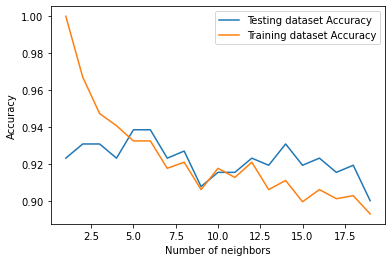

In [75]:
neighbors = np.arange(1, 20)
knn_train_accuracy = np.empty(len(neighbors))
knn_test_accuracy = np.empty(len(neighbors))
 
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_knorm1, train_Y1)
     
    # Compute training and test data accuracy
    knn_train_accuracy[i] = knn.score(x_train_knorm1, train_Y1)
    knn_test_accuracy[i] = knn.score(x_test_knorm1, test_Y1)
 
# Generate plot
plt.plot(neighbors, knn_test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, knn_train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [76]:
# optimum value of k = 5

knn_5 = KNeighborsClassifier(n_neighbors=5)
 
knn_5.fit(x_train_knorm1, train_Y1)

# Predict on dataset which model has seen before
knn_predict_train_1 = knn_5.predict(x_train_knorm1)

print('Confusion Matrix for Train data:')
print(confusion_matrix(train_Y1, knn_predict_train_1))
print('\nClassification Report')
print(classification_report(train_Y1, knn_predict_train_1))
print("\nAccuracy Score on train set:")
print(knn_5.score(x_train_knorm1, train_Y1))
 
# Predict on dataset which model has not seen before
knn_predict1 = knn_5.predict(x_test_knorm1)

print('Confusion Matrix:')
print(confusion_matrix(test_Y1, knn_predict1))
print('\nClassification Report')
print(classification_report(test_Y1, knn_predict1))
print("\nAccuracy Score on test set:")
print(knn_5.score(x_test_knorm1, test_Y1))

# ROC & AUC
knn_auc1 = np.round(roc_auc_score(test_Y1, knn_predict1), 3)
 
print("\nAUC for our sample data is {}". format(knn_auc1))

recall_sensitivity = metrics.recall_score(test_Y1, knn_predict1, pos_label=1)
recall_specificity = metrics.recall_score(test_Y1, knn_predict1, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Confusion Matrix for Train data:
[[273  25]
 [ 16 295]]

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       298
           1       0.92      0.95      0.94       311

    accuracy                           0.93       609
   macro avg       0.93      0.93      0.93       609
weighted avg       0.93      0.93      0.93       609


Accuracy Score on train set:
0.9326765188834154
Confusion Matrix:
[[126  11]
 [  5 119]]

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       137
           1       0.92      0.96      0.94       124

    accuracy                           0.94       261
   macro avg       0.94      0.94      0.94       261
weighted avg       0.94      0.94      0.94       261


Accuracy Score on test set:
0.9386973180076629

AUC for our sample data is 0.94
Sensitivity Score on test data: 0.9596774193548387
Specificity Score on t

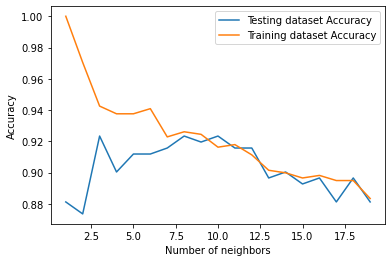

In [77]:
# Normalize the data for knn implementation

# returns a numpy array of the dataframe
x_train_k2 = train_X2.values
x_test_k2 = test_X2.values

min_max_scaler = preprocessing.MinMaxScaler()

# scale features
x_train_knorm2 = min_max_scaler.fit_transform(x_train_k2)
x_test_knorm2 = min_max_scaler.fit_transform(x_test_k2)


neighbors = np.arange(1, 20)
knn_train_accuracy = np.empty(len(neighbors))
knn_test_accuracy = np.empty(len(neighbors))
 
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_knorm2, train_Y2)
     
    # Compute training and test data accuracy
    knn_train_accuracy[i] = knn.score(x_train_knorm2, train_Y2)
    knn_test_accuracy[i] = knn.score(x_test_knorm2, test_Y2)
 
# Generate plot
plt.plot(neighbors, knn_test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, knn_train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [78]:
# optimum value of k = 10

knn_10 = KNeighborsClassifier(n_neighbors=10)
 
knn_10.fit(x_train_knorm2, train_Y2)

# Predict on dataset which model has not seen before
knn_predict_train_2 = knn_10.predict(x_train_knorm2)

print('Confusion Matrix for Train data:')
print(confusion_matrix(train_Y2, knn_predict_train_2))
print('\nClassification Report')
print(classification_report(train_Y2, knn_predict_train_2))
print("\nAccuracy Score on train set:")
print(knn_10.score(x_train_knorm2, train_Y2))
 
# Predict on dataset which model has not seen before
knn_test_predict2 = knn_10.predict(x_test_knorm2)

print('Confusion Matrix:')
print(confusion_matrix(test_Y2, knn_test_predict2))
print('\nClassification Report')
print(classification_report(test_Y2, knn_test_predict2))
print("\nAccuracy Score on test set:")
print(knn_10.score(x_test_knorm2, test_Y2))

# ROC & AUC
knn_auc2 = np.round(roc_auc_score(test_Y2, knn_test_predict2), 3)
 
print("\nAUC for our sample data is {}". format(knn_auc2))

recall_sensitivity = metrics.recall_score(test_Y2, knn_test_predict2, pos_label=1)
recall_specificity = metrics.recall_score(test_Y2, knn_test_predict2, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Confusion Matrix for Train data:
[[265  33]
 [ 18 293]]

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.89      0.91       298
           1       0.90      0.94      0.92       311

    accuracy                           0.92       609
   macro avg       0.92      0.92      0.92       609
weighted avg       0.92      0.92      0.92       609


Accuracy Score on train set:
0.916256157635468
Confusion Matrix:
[[129   8]
 [ 12 112]]

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       137
           1       0.93      0.90      0.92       124

    accuracy                           0.92       261
   macro avg       0.92      0.92      0.92       261
weighted avg       0.92      0.92      0.92       261


Accuracy Score on test set:
0.9233716475095786

AUC for our sample data is 0.922
Sensitivity Score on test data: 0.9032258064516129
Specificity Score on t

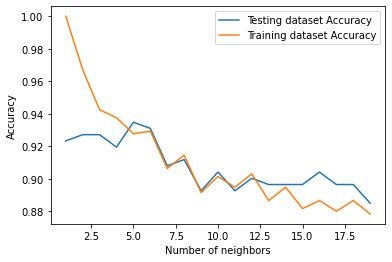

In [79]:
# Normalize the data for knn implementation

# returns a numpy array of the dataframe
x_train_k3 = train_X3.values
x_test_k3 = test_X3.values

min_max_scaler = preprocessing.MinMaxScaler()

# scale features
x_train_knorm3 = min_max_scaler.fit_transform(x_train_k3)
x_test_knorm3 = min_max_scaler.fit_transform(x_test_k3)


neighbors = np.arange(1, 20)
knn_train_accuracy = np.empty(len(neighbors))
knn_test_accuracy = np.empty(len(neighbors))
 
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_knorm3, train_Y3)
     
    # Compute training and test data accuracy
    knn_train_accuracy[i] = knn.score(x_train_knorm3, train_Y3)
    knn_test_accuracy[i] = knn.score(x_test_knorm3, test_Y3)
 
# Generate plot
plt.plot(neighbors, knn_test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, knn_train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [80]:
# optimum value of k = 5

knn_5 = KNeighborsClassifier(n_neighbors=5)
 
knn_5.fit(x_train_knorm3, train_Y3)

# Predict on dataset which model has seen before
knn_predict3 = knn_5.predict(x_train_knorm3)

print('Confusion Matrix:')
print(confusion_matrix(train_Y3, knn_predict3))
print('\nClassification Report')
print(classification_report(train_Y3, knn_predict3))
print("\nAccuracy Score on test set:")
print(knn_5.score(x_train_knorm3, train_Y3))
 
# Predict on dataset which model has not seen before
knn_predict3 = knn_5.predict(x_test_knorm3)

print('Confusion Matrix:')
print(confusion_matrix(test_Y3, knn_predict3))
print('\nClassification Report')
print(classification_report(test_Y3, knn_predict3))
print("\nAccuracy Score on test set:")
print(knn_5.score(x_test_knorm3, test_Y3))

# ROC & AUC
knn_auc3 = np.round(roc_auc_score(test_Y3, knn_predict3), 3)
 
print("\nAUC for our sample data is {}". format(knn_auc3))

recall_sensitivity = metrics.recall_score(test_Y3, knn_predict3, pos_label=1)
recall_specificity = metrics.recall_score(test_Y3, knn_predict3, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Confusion Matrix:
[[270  28]
 [ 16 295]]

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       298
           1       0.91      0.95      0.93       311

    accuracy                           0.93       609
   macro avg       0.93      0.93      0.93       609
weighted avg       0.93      0.93      0.93       609


Accuracy Score on test set:
0.9277504105090312
Confusion Matrix:
[[125  12]
 [  5 119]]

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.91      0.94       137
           1       0.91      0.96      0.93       124

    accuracy                           0.93       261
   macro avg       0.93      0.94      0.93       261
weighted avg       0.94      0.93      0.93       261


Accuracy Score on test set:
0.9348659003831418

AUC for our sample data is 0.936
Sensitivity Score on test data: 0.9596774193548387
Specificity Score on test data: 0.912

#### Implementation on undersampled datasets

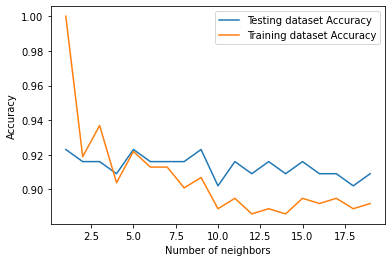

In [81]:
# Normalize the data for knn implementation

# returns a numpy array of the dataframe
x_train_k4 = train_X4.values
x_test_k4 = test_X4.values

min_max_scaler = preprocessing.MinMaxScaler()

# scale features
x_train_knorm4 = min_max_scaler.fit_transform(x_train_k4)
x_test_knorm4 = min_max_scaler.fit_transform(x_test_k4)


neighbors = np.arange(1, 20)
knn_train_accuracy = np.empty(len(neighbors))
knn_test_accuracy = np.empty(len(neighbors))
 
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_knorm4, train_Y4)
     
    # Compute training and test data accuracy
    knn_train_accuracy[i] = knn.score(x_train_knorm4, train_Y4)
    knn_test_accuracy[i] = knn.score(x_test_knorm4, test_Y4)
 
# Generate plot
plt.plot(neighbors, knn_test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, knn_train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [82]:
# optimum value of k = 8

knn_8 = KNeighborsClassifier(n_neighbors=8)
 
knn_8.fit(x_train_knorm4, train_Y4)

# Predict on dataset which model has seen before
knn_predict4 = knn_8.predict(x_train_knorm4)

print('Confusion Matrix:')
print(confusion_matrix(train_Y4, knn_predict4))
print('\nClassification Report')
print(classification_report(train_Y4, knn_predict4))
print("\nAccuracy Score on validation set:")
print(knn_8.score(x_train_knorm4, train_Y4))
 
# Predict on dataset which model has not seen before
knn_predict4 = knn_8.predict(x_test_knorm4)

print('Confusion Matrix:')
print(confusion_matrix(test_Y4, knn_predict4))
print('\nClassification Report')
print(classification_report(test_Y4, knn_predict4))
print("\nAccuracy Score on validation set:")
print(knn_8.score(x_test_knorm4, test_Y4))

# ROC & AUC
knn_auc4 = np.round(roc_auc_score(test_Y4, knn_predict4), 3)
 
print("\nAUC for our sample data is {}". format(knn_auc4))

recall_sensitivity = metrics.recall_score(test_Y4, knn_predict4, pos_label=1)
recall_specificity = metrics.recall_score(test_Y4, knn_predict4, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Confusion Matrix:
[[291   1]
 [ 32   9]]

Classification Report
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       292
           1       0.90      0.22      0.35        41

    accuracy                           0.90       333
   macro avg       0.90      0.61      0.65       333
weighted avg       0.90      0.90      0.87       333


Accuracy Score on validation set:
0.9009009009009009
Confusion Matrix:
[[128   0]
 [ 12   3]]

Classification Report
              precision    recall  f1-score   support

           0       0.91      1.00      0.96       128
           1       1.00      0.20      0.33        15

    accuracy                           0.92       143
   macro avg       0.96      0.60      0.64       143
weighted avg       0.92      0.92      0.89       143


Accuracy Score on validation set:
0.916083916083916

AUC for our sample data is 0.6
Sensitivity Score on test data: 0.2
Specificity Score on test data: 1.0


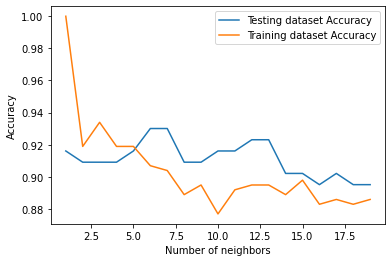

In [83]:
# Normalize the data for knn implementation

# returns a numpy array of the dataframe
x_train_k5 = train_X5.values
x_test_k5 = test_X5.values

min_max_scaler = preprocessing.MinMaxScaler()

# scale features
x_train_knorm5 = min_max_scaler.fit_transform(x_train_k5)
x_test_knorm5 = min_max_scaler.fit_transform(x_test_k5)


neighbors = np.arange(1, 20)
knn_train_accuracy = np.empty(len(neighbors))
knn_test_accuracy = np.empty(len(neighbors))
 
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_knorm5, train_Y5)
     
    # Compute training and test data accuracy
    knn_train_accuracy[i] = knn.score(x_train_knorm5, train_Y5)
    knn_test_accuracy[i] = knn.score(x_test_knorm5, test_Y5)
 
# Generate plot
plt.plot(neighbors, knn_test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, knn_train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [84]:
# optimum value of k = 7

knn_7 = KNeighborsClassifier(n_neighbors=7)
 
knn_7.fit(x_train_knorm5, train_Y5)

# Predict on dataset which model has seen before
knn_predict5 = knn_7.predict(x_train_knorm5)

print('Confusion Matrix:')
print(confusion_matrix(train_Y5, knn_predict5))
print('\nClassification Report')
print(classification_report(train_Y5, knn_predict5))
print("\nAccuracy Score on validation set:")
print(knn_7.score(x_train_knorm5, train_Y5))
 
# Predict on dataset which model has not seen before
knn_predict5 = knn_7.predict(x_test_knorm5)

print('Confusion Matrix:')
print(confusion_matrix(test_Y5, knn_predict5))
print('\nClassification Report')
print(classification_report(test_Y5, knn_predict5))
print("\nAccuracy Score on validation set:")
print(knn_7.score(x_test_knorm5, test_Y5))

# ROC & AUC
knn_auc5 = np.round(roc_auc_score(test_Y5, knn_predict5), 3)
 
print("\nAUC for our sample data is {}". format(knn_auc5))

recall_sensitivity = metrics.recall_score(test_Y5, knn_predict5, pos_label=1)
recall_specificity = metrics.recall_score(test_Y5, knn_predict5, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Confusion Matrix:
[[287   5]
 [ 27  14]]

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.98      0.95       292
           1       0.74      0.34      0.47        41

    accuracy                           0.90       333
   macro avg       0.83      0.66      0.71       333
weighted avg       0.89      0.90      0.89       333


Accuracy Score on validation set:
0.9039039039039038
Confusion Matrix:
[[127   1]
 [  9   6]]

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       128
           1       0.86      0.40      0.55        15

    accuracy                           0.93       143
   macro avg       0.90      0.70      0.75       143
weighted avg       0.93      0.93      0.92       143


Accuracy Score on validation set:
0.9300699300699301

AUC for our sample data is 0.696
Sensitivity Score on test data: 0.4
Specificity Score on test data: 0.992187

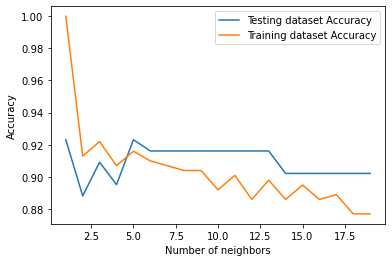

In [88]:
# Normalize the data for knn implementation

# returns a numpy array of the dataframe
x_train_k6 = train_X6.values
x_test_k6 = test_X6.values

min_max_scaler = preprocessing.MinMaxScaler()

# scale features
x_train_knorm6 = min_max_scaler.fit_transform(x_train_k6)
x_test_knorm6 = min_max_scaler.fit_transform(x_test_k6)


neighbors = np.arange(1, 20)
knn_train_accuracy = np.empty(len(neighbors))
knn_test_accuracy = np.empty(len(neighbors))
 
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_knorm6, train_Y6)
     
    # Compute training and test data accuracy
    knn_train_accuracy[i] = knn.score(x_train_knorm6, train_Y6)
    knn_test_accuracy[i] = knn.score(x_test_knorm6, test_Y6)
 
# Generate plot
plt.plot(neighbors, knn_test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, knn_train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

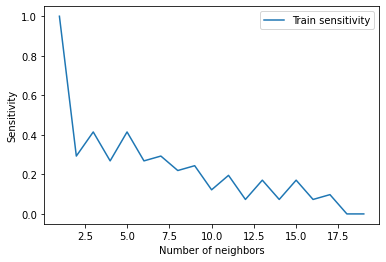

In [91]:
# Normalize the data for knn implementation

# returns a numpy array of the dataframe
x_train_k6 = train_X6.values
x_test_k6 = test_X6.values

min_max_scaler = preprocessing.MinMaxScaler()

# scale features
x_train_knorm6 = min_max_scaler.fit_transform(x_train_k6)
x_test_knorm6 = min_max_scaler.fit_transform(x_test_k6)


neighbors = np.arange(1, 20)
knn_train_sensitivity = np.empty(len(neighbors))
 
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_knorm6, train_Y6)
    knn_predict = knn.predict(x_train_knorm6)
     
    # Compute training and test data accuracy
    knn_train_sensitivity[i] = metrics.recall_score(train_Y6, knn_predict, pos_label=1)
 
# Generate plot
plt.plot(neighbors, knn_train_sensitivity, label = 'Train sensitivity')
 
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Sensitivity')
plt.show()

In [86]:
# optimum value of k = 5

knn_5 = KNeighborsClassifier(n_neighbors=5)
 
knn_5.fit(x_train_knorm6, train_Y6)

# Predict on dataset which model has not seen before
knn_predict6 = knn_5.predict(x_train_knorm6)

print('Confusion Matrix:')
print(confusion_matrix(train_Y6, knn_predict6))
print('\nClassification Report')
print(classification_report(train_Y6, knn_predict6))
print("\nAccuracy Score on test set:")
print(knn_5.score(x_train_knorm6, train_Y6))
 
# Predict on dataset which model has not seen before
knn_predict6 = knn_5.predict(x_test_knorm6)

print('Confusion Matrix:')
print(confusion_matrix(test_Y6, knn_predict6))
print('\nClassification Report')
print(classification_report(test_Y6, knn_predict6))
print("\nAccuracy Score on test set:")
print(knn_5.score(x_test_knorm6, test_Y6))

# ROC & AUC
knn_auc6 = np.round(roc_auc_score(test_Y6, knn_predict6), 3)
 
print("\nAUC for our sample data is {}". format(knn_auc6))

recall_sensitivity = metrics.recall_score(test_Y6, knn_predict6, pos_label=1)
recall_specificity = metrics.recall_score(test_Y6, knn_predict6, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Confusion Matrix:
[[288   4]
 [ 24  17]]

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       292
           1       0.81      0.41      0.55        41

    accuracy                           0.92       333
   macro avg       0.87      0.70      0.75       333
weighted avg       0.91      0.92      0.90       333


Accuracy Score on test set:
0.9159159159159159
Confusion Matrix:
[[127   1]
 [ 10   5]]

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       128
           1       0.83      0.33      0.48        15

    accuracy                           0.92       143
   macro avg       0.88      0.66      0.72       143
weighted avg       0.92      0.92      0.91       143


Accuracy Score on test set:
0.9230769230769231

AUC for our sample data is 0.663
Sensitivity Score on test data: 0.3333333333333333
Specificity Score on test data: 0.992

## ALGORITHM: Support Vector Machines

### Unsampled data

In [92]:
# scale data
# Normalize the data for SVM implementation

# returns a numpy array of the dataframe
x_train_sv0 = train_X0.values
x_test_sv0 = test_X0.values

min_max_scaler = preprocessing.MinMaxScaler()

# scale features
x_train_svnorm0 = min_max_scaler.fit_transform(x_train_sv0)
x_test_svnorm0 = min_max_scaler.fit_transform(x_test_sv0)

In [93]:
# Baseline dataframe

# train the model on train set
svm_model =  svm.SVC()
svm_model.fit(x_train_svnorm0, train_Y0)
 
# print prediction results
print('Train data results:\n')
svm_prediction0 = svm_model.predict(x_train_svnorm0)
print(classification_report(train_Y0, svm_prediction0))

print('Test data results:\n')
svm_prediction0 = svm_model.predict(x_test_svnorm0)
print(classification_report(test_Y0, svm_prediction0))

# ROC & AUC
svm_auc0 = np.round(roc_auc_score(test_Y0, svm_prediction0), 3)
 
print("\nAUC for our sample data is {}". format(svm_auc0))

recall_sensitivity = metrics.recall_score(test_Y0, svm_prediction0, pos_label=1)
recall_specificity = metrics.recall_score(test_Y0, svm_prediction0, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Train data results:

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       303
           1       1.00      0.50      0.67        40

    accuracy                           0.94       343
   macro avg       0.97      0.75      0.82       343
weighted avg       0.95      0.94      0.93       343

Test data results:

              precision    recall  f1-score   support

           0       0.90      0.98      0.93       132
           1       0.25      0.06      0.10        16

    accuracy                           0.88       148
   macro avg       0.57      0.52      0.52       148
weighted avg       0.83      0.88      0.84       148


AUC for our sample data is 0.52
Sensitivity Score on test data: 0.0625
Specificity Score on test data: 0.9772727272727273


### Oversampled datasets

In [94]:
# Oversampled 1

# scale data
# Normalize the data for SVM implementation

# returns a numpy array of the dataframe
x_train_sv1 = train_X1.values
x_test_sv1 = test_X1.values

min_max_scaler = preprocessing.MinMaxScaler()

# scale features
x_train_svnorm1 = min_max_scaler.fit_transform(x_train_sv1)
x_test_svnorm1 = min_max_scaler.fit_transform(x_test_sv1)

# Baseline data

# train the model on train set
svm_model.fit(x_train_svnorm1, train_Y1)
 
# print prediction results
print('Train data results:\n')
svm_prediction1 = svm_model.predict(x_train_svnorm1)
print(classification_report(train_Y1, svm_prediction1))

print('Test data results:\n')
svm_prediction1 = svm_model.predict(x_test_svnorm1)
print(classification_report(test_Y1, svm_prediction1))

# ROC & AUC
svm_auc1 = np.round(roc_auc_score(test_Y1, svm_prediction1), 3)
 
print("\nAUC for our sample data is {}". format(svm_auc1))

recall_sensitivity = metrics.recall_score(test_Y1, svm_prediction1, pos_label=1)
recall_specificity = metrics.recall_score(test_Y1, svm_prediction1, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Train data results:

              precision    recall  f1-score   support

           0       0.96      0.91      0.93       298
           1       0.92      0.96      0.94       311

    accuracy                           0.94       609
   macro avg       0.94      0.94      0.94       609
weighted avg       0.94      0.94      0.94       609

Test data results:

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       137
           1       0.95      0.97      0.96       124

    accuracy                           0.96       261
   macro avg       0.96      0.96      0.96       261
weighted avg       0.96      0.96      0.96       261


AUC for our sample data is 0.962
Sensitivity Score on test data: 0.967741935483871
Specificity Score on test data: 0.9562043795620438


In [95]:
# Oversampled 2

# scale data
# Normalize the data for SVM implementation

# returns a numpy array of the dataframe
x_train_sv2 = train_X2.values
x_test_sv2 = test_X2.values

min_max_scaler = preprocessing.MinMaxScaler()

# scale features
x_train_svnorm2 = min_max_scaler.fit_transform(x_train_sv2)
x_test_svnorm2 = min_max_scaler.fit_transform(x_test_sv2)

# Baseline data

# train the model on train set
svm_model.fit(x_train_svnorm2, train_Y2)
 
# print prediction results
print('Train data results:\n')
svm_prediction2 = svm_model.predict(x_train_svnorm2)
print(classification_report(train_Y2, svm_prediction2))

print('Test data results:\n')
svm_prediction2 = svm_model.predict(x_test_svnorm2)
print(classification_report(test_Y2, svm_prediction2))

# ROC & AUC
svm_auc2 = np.round(roc_auc_score(test_Y2, svm_prediction2), 3)
 
print("\nAUC for our sample data is {}". format(svm_auc2))

recall_sensitivity = metrics.recall_score(test_Y2, svm_prediction2, pos_label=1)
recall_specificity = metrics.recall_score(test_Y2, svm_prediction2, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Train data results:

              precision    recall  f1-score   support

           0       0.95      0.85      0.90       298
           1       0.87      0.96      0.91       311

    accuracy                           0.90       609
   macro avg       0.91      0.90      0.90       609
weighted avg       0.91      0.90      0.90       609

Test data results:

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       137
           1       0.93      0.91      0.92       124

    accuracy                           0.93       261
   macro avg       0.93      0.93      0.93       261
weighted avg       0.93      0.93      0.93       261


AUC for our sample data is 0.926
Sensitivity Score on test data: 0.9112903225806451
Specificity Score on test data: 0.9416058394160584


In [96]:
# Oversampled 3

# scale data
# Normalize the data for SVM implementation

# returns a numpy array of the dataframe
x_train_sv3 = train_X3.values
x_test_sv3 = test_X3.values

min_max_scaler = preprocessing.MinMaxScaler()

# scale features
x_train_svnorm3 = min_max_scaler.fit_transform(x_train_sv3)
x_test_svnorm3 = min_max_scaler.fit_transform(x_test_sv3)

# Baseline data

# train the model on train set
svm_model.fit(x_train_svnorm3, train_Y3)
 
# print prediction results
print('Train data results:\n')
svm_prediction3 = svm_model.predict(x_train_svnorm3)
print(classification_report(train_Y3, svm_prediction3))

print('Test data results:\n')
svm_prediction3 = svm_model.predict(x_test_svnorm3)
print(classification_report(test_Y3, svm_prediction3))

# ROC & AUC
svm_auc3 = np.round(roc_auc_score(test_Y3, svm_prediction3), 3)
 
print("\nAUC for our sample data is {}". format(svm_auc3))

recall_sensitivity = metrics.recall_score(test_Y3, svm_prediction3, pos_label=1)
recall_specificity = metrics.recall_score(test_Y3, svm_prediction3, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Train data results:

              precision    recall  f1-score   support

           0       0.96      0.88      0.91       298
           1       0.89      0.96      0.92       311

    accuracy                           0.92       609
   macro avg       0.92      0.92      0.92       609
weighted avg       0.92      0.92      0.92       609

Test data results:

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       137
           1       0.94      0.95      0.94       124

    accuracy                           0.95       261
   macro avg       0.95      0.95      0.95       261
weighted avg       0.95      0.95      0.95       261


AUC for our sample data is 0.947
Sensitivity Score on test data: 0.9516129032258065
Specificity Score on test data: 0.9416058394160584


### Oversampled datasets

In [97]:
# Oversampled 4

# scale data
# Normalize the data for SVM implementation

# returns a numpy array of the dataframe
x_train_sv4 = train_X4.values
x_test_sv4 = test_X4.values

min_max_scaler = preprocessing.MinMaxScaler()

# scale features
x_train_svnorm4 = min_max_scaler.fit_transform(x_train_sv4)
x_test_svnorm4 = min_max_scaler.fit_transform(x_test_sv4)

# Baseline data

# train the model on train set
svm_model.fit(x_train_svnorm4, train_Y4)
 
# print prediction results
print('Train data results:\n')
svm_prediction4 = svm_model.predict(x_train_svnorm4)
print(classification_report(train_Y4, svm_prediction4))

print('Test data results:\n')
svm_prediction4 = svm_model.predict(x_test_svnorm4)
print(classification_report(test_Y4, svm_prediction4))

# ROC & AUC
svm_auc4 = np.round(roc_auc_score(test_Y4, svm_prediction4), 3)
 
print("\nAUC for our sample data is {}". format(svm_auc4))

recall_sensitivity = metrics.recall_score(test_Y4, svm_prediction4, pos_label=1)
recall_specificity = metrics.recall_score(test_Y4, svm_prediction4, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Train data results:

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       292
           1       0.95      0.46      0.62        41

    accuracy                           0.93       333
   macro avg       0.94      0.73      0.79       333
weighted avg       0.93      0.93      0.92       333

Test data results:

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       128
           1       0.80      0.27      0.40        15

    accuracy                           0.92       143
   macro avg       0.86      0.63      0.68       143
weighted avg       0.91      0.92      0.90       143


AUC for our sample data is 0.629
Sensitivity Score on test data: 0.26666666666666666
Specificity Score on test data: 0.9921875


In [98]:
# Oversampled 5

# scale data
# Normalize the data for SVM implementation

# returns a numpy array of the dataframe
x_train_sv5 = train_X5.values
x_test_sv5 = test_X5.values

min_max_scaler = preprocessing.MinMaxScaler()

# scale features
x_train_svnorm5 = min_max_scaler.fit_transform(x_train_sv5)
x_test_svnorm5 = min_max_scaler.fit_transform(x_test_sv5)

# Baseline data

# train the model on train set
svm_model.fit(x_train_svnorm5, train_Y5)
 
# print prediction results
print('Train data results:\n')
svm_prediction5 = svm_model.predict(x_train_svnorm5)
print(classification_report(train_Y5, svm_prediction5))

print('Test data results:\n')
svm_prediction5 = svm_model.predict(x_test_svnorm5)
print(classification_report(test_Y5, svm_prediction5))

# ROC & AUC
svm_auc5 = np.round(roc_auc_score(test_Y5, svm_prediction5), 3)
 
print("\nAUC for our sample data is {}". format(svm_auc5))

recall_sensitivity = metrics.recall_score(test_Y5, svm_prediction5, pos_label=1)
recall_specificity = metrics.recall_score(test_Y5, svm_prediction5, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Train data results:

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       292
           1       0.78      0.44      0.56        41

    accuracy                           0.92       333
   macro avg       0.85      0.71      0.76       333
weighted avg       0.91      0.92      0.91       333

Test data results:

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       128
           1       0.83      0.33      0.48        15

    accuracy                           0.92       143
   macro avg       0.88      0.66      0.72       143
weighted avg       0.92      0.92      0.91       143


AUC for our sample data is 0.663
Sensitivity Score on test data: 0.3333333333333333
Specificity Score on test data: 0.9921875


In [99]:
# Oversampled 6

# scale data
# Normalize the data for SVM implementation

# returns a numpy array of the dataframe
x_train_sv6 = train_X6.values
x_test_sv6 = test_X6.values

min_max_scaler = preprocessing.MinMaxScaler()

# scale features
x_train_svnorm6 = min_max_scaler.fit_transform(x_train_sv6)
x_test_svnorm6 = min_max_scaler.fit_transform(x_test_sv6)

# Baseline data

# train the model on train set
svm_model.fit(x_train_svnorm6, train_Y6)
 
# print prediction results
print('Train data results:\n')
svm_prediction6 = svm_model.predict(x_train_svnorm6)
print(classification_report(train_Y6, svm_prediction6))

print('Test data results:\n')
svm_prediction6 = svm_model.predict(x_test_svnorm6)
print(classification_report(test_Y6, svm_prediction6))

# ROC & AUC
svm_auc6 = np.round(roc_auc_score(test_Y6, svm_prediction6), 3)
 
print("\nAUC for our sample data is {}". format(svm_auc6))

recall_sensitivity = metrics.recall_score(test_Y6, svm_prediction6, pos_label=1)
recall_specificity = metrics.recall_score(test_Y6, svm_prediction6, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Train data results:

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       292
           1       0.95      0.44      0.60        41

    accuracy                           0.93       333
   macro avg       0.94      0.72      0.78       333
weighted avg       0.93      0.93      0.92       333

Test data results:

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       128
           1       0.75      0.20      0.32        15

    accuracy                           0.91       143
   macro avg       0.83      0.60      0.63       143
weighted avg       0.90      0.91      0.88       143


AUC for our sample data is 0.596
Sensitivity Score on test data: 0.2
Specificity Score on test data: 0.9921875


## ALGORITHM: Logistic Regression

In [100]:
# define model
lr_model = LogisticRegression()

### Unsampled data

In [101]:
# fitting model
lr_model.fit(train_X0, train_Y0)

# Predict on dataset which model has not seen before
lr_predict0 = lr_model.predict(train_X0)
print('Resulting performance on TRAIN SET:')
print('Confusion Matrix:')
print(confusion_matrix(train_Y0, lr_predict0))
print('\nClassification Report')
print(classification_report(train_Y0, lr_predict0))
print("\nAccuracy Score on train set:")
print(lr_model.score(train_X0, train_Y0))

# Predict on dataset which model has not seen before
lr_predict0 = lr_model.predict(test_X0)
print('\n\nResulting performance on TEST SET:')
print('Confusion Matrix:')
print(confusion_matrix(test_Y0, lr_predict0))
print('\nClassification Report')
print(classification_report(test_Y0, lr_predict0))
print("\nAccuracy Score on test set:")
print(lr_model.score(test_X0, test_Y0))

# ROC & AUC
lr_auc0 = np.round(roc_auc_score(test_Y0, lr_predict0), 3)
 
print("\nAUC for our sample data is {}". format(lr_auc0))

recall_sensitivity = metrics.recall_score(test_Y0, lr_predict0, pos_label=1)
recall_specificity = metrics.recall_score(test_Y0, lr_predict0, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Resulting performance on TRAIN SET:
Confusion Matrix:
[[296   7]
 [ 17  23]]

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       303
           1       0.77      0.57      0.66        40

    accuracy                           0.93       343
   macro avg       0.86      0.78      0.81       343
weighted avg       0.92      0.93      0.93       343


Accuracy Score on train set:
0.9300291545189504


Resulting performance on TEST SET:
Confusion Matrix:
[[122  10]
 [  8   8]]

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       132
           1       0.44      0.50      0.47        16

    accuracy                           0.88       148
   macro avg       0.69      0.71      0.70       148
weighted avg       0.89      0.88      0.88       148


Accuracy Score on test set:
0.8783783783783784

AUC for our sample data is 0.712
Sensitivity Sc

### Oversampled data

In [102]:
lr_model.fit(train_X1, train_Y1)

# Predict on dataset which model has not seen before
lr_predict1 = lr_model.predict(train_X1)
print('Resulting performance on TRAIN SET:')
print('Confusion Matrix:')
print(confusion_matrix(train_Y1, lr_predict1))
print('\nClassification Report')
print(classification_report(train_Y1, lr_predict1))
print("\nAccuracy Score on test set:")
print(lr_model.score(train_X1, train_Y1))

# Predict on dataset which model has not seen before
lr_predict1 = lr_model.predict(test_X1)
print('\n\nResulting performance on TEST SET:')
print('Confusion Matrix:')
print(confusion_matrix(test_Y1, lr_predict1))
print('\nClassification Report')
print(classification_report(test_Y1, lr_predict1))
print("\nAccuracy Score on test set:")
print(lr_model.score(test_X1, test_Y1))

# ROC & AUC
lr_auc1 = np.round(roc_auc_score(test_Y1, lr_predict1), 3)
 
print("\nAUC for our sample data is {}". format(lr_auc1))

recall_sensitivity = metrics.recall_score(test_Y1, lr_predict1, pos_label=1)
recall_specificity = metrics.recall_score(test_Y1, lr_predict1, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Resulting performance on TRAIN SET:
Confusion Matrix:
[[271  27]
 [ 21 290]]

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       298
           1       0.91      0.93      0.92       311

    accuracy                           0.92       609
   macro avg       0.92      0.92      0.92       609
weighted avg       0.92      0.92      0.92       609


Accuracy Score on test set:
0.9211822660098522


Resulting performance on TEST SET:
Confusion Matrix:
[[122  15]
 [  4 120]]

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.89      0.93       137
           1       0.89      0.97      0.93       124

    accuracy                           0.93       261
   macro avg       0.93      0.93      0.93       261
weighted avg       0.93      0.93      0.93       261


Accuracy Score on test set:
0.9272030651340997

AUC for our sample data is 0.929
Sensitivity Sco

In [103]:
lr_model.fit(train_X2, train_Y2) # fitting baseline model

# Predict on train dataset which model has not seen before
lr_predict2 = lr_model.predict(train_X2)
print('Resulting performance on TRAIN SET:')
print('Confusion Matrix:')
print(confusion_matrix(train_Y2, lr_predict2))
print('\nClassification Report')
print(classification_report(train_Y2, lr_predict2))
print("\nAccuracy Score on test set:")
print(lr_model.score(train_X2, train_Y2))

# Predict on dataset which model has not seen before
lr_predict2 = lr_model.predict(test_X2)
print('\n\nResulting performance on TEST SET:')
print('Confusion Matrix:')
print(confusion_matrix(test_Y2, lr_predict2))
print('\nClassification Report')
print(classification_report(test_Y2, lr_predict2))
print("\nAccuracy Score on test set:")
print(lr_model.score(test_X2, test_Y2))

# ROC & AUC
lr_auc2 = np.round(roc_auc_score(test_Y2, lr_predict2), 3)
 
print("\nAUC for our sample data is {}". format(lr_auc2))

recall_sensitivity = metrics.recall_score(test_Y2, lr_predict2, pos_label=1)
recall_specificity = metrics.recall_score(test_Y2, lr_predict2, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Resulting performance on TRAIN SET:
Confusion Matrix:
[[266  32]
 [ 25 286]]

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       298
           1       0.90      0.92      0.91       311

    accuracy                           0.91       609
   macro avg       0.91      0.91      0.91       609
weighted avg       0.91      0.91      0.91       609


Accuracy Score on test set:
0.9064039408866995


Resulting performance on TEST SET:
Confusion Matrix:
[[121  16]
 [  6 118]]

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.88      0.92       137
           1       0.88      0.95      0.91       124

    accuracy                           0.92       261
   macro avg       0.92      0.92      0.92       261
weighted avg       0.92      0.92      0.92       261


Accuracy Score on test set:
0.9157088122605364

AUC for our sample data is 0.917
Sensitivity Sco

In [104]:
lr_model.fit(train_X3, train_Y3)

# Predict on dataset which model has not seen before
lr_predict3 = lr_model.predict(train_X3)
print('Resulting performance on TRAIN SET:')
print('Confusion Matrix:')
print(confusion_matrix(train_Y3, lr_predict3))
print('\nClassification Report')
print(classification_report(train_Y3, lr_predict3))
print("\nAccuracy Score on test set:")
print(lr_model.score(train_X3, train_Y3))

# Predict on dataset which model has not seen before
lr_predict3 = lr_model.predict(test_X3)
print('\n\nResulting performance on TEST SET:')
print('Confusion Matrix:')
print(confusion_matrix(test_Y3, lr_predict3))
print('\nClassification Report')
print(classification_report(test_Y3, lr_predict3))
print("\nAccuracy Score on test set:")
print(lr_model.score(test_X3, test_Y3))

# ROC & AUC
lr_auc3 = np.round(roc_auc_score(test_Y3, lr_predict3), 3)
 
print("\nAUC for our sample data is {}". format(lr_auc3))

recall_sensitivity = metrics.recall_score(test_Y3, lr_predict3, pos_label=1)
recall_specificity = metrics.recall_score(test_Y3, lr_predict3, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Resulting performance on TRAIN SET:
Confusion Matrix:
[[268  30]
 [ 20 291]]

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.90      0.91       298
           1       0.91      0.94      0.92       311

    accuracy                           0.92       609
   macro avg       0.92      0.92      0.92       609
weighted avg       0.92      0.92      0.92       609


Accuracy Score on test set:
0.9178981937602627


Resulting performance on TEST SET:
Confusion Matrix:
[[121  16]
 [  4 120]]

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.88      0.92       137
           1       0.88      0.97      0.92       124

    accuracy                           0.92       261
   macro avg       0.93      0.93      0.92       261
weighted avg       0.93      0.92      0.92       261


Accuracy Score on test set:
0.9233716475095786

AUC for our sample data is 0.925
Sensitivity Sco

### Undersampled data

In [105]:
lr_model.fit(train_X4, train_Y4)

# Predict on dataset which model has not seen before
lr_predict4 = lr_model.predict(train_X4)
print('Resulting performance on TRAIN SET:')
print('Confusion Matrix:')
print(confusion_matrix(train_Y4, lr_predict4))
print('\nClassification Report')
print(classification_report(train_Y4, lr_predict4))
print("\nAccuracy Score on test set:")
print(lr_model.score(train_X4, train_Y4))

# Predict on dataset which model has not seen before
lr_predict4 = lr_model.predict(test_X4)
print('\n\nResulting performance on TEST SET:')
print('Confusion Matrix:')
print(confusion_matrix(test_Y4, lr_predict4))
print('\nClassification Report')
print(classification_report(test_Y4, lr_predict4))
print("\nAccuracy Score on test set:")
print(lr_model.score(test_X4, test_Y4))

# ROC & AUC
lr_auc4 = np.round(roc_auc_score(test_Y4, lr_predict4), 3)
 
print("\nAUC for our sample data is {}". format(lr_auc4))

recall_sensitivity = metrics.recall_score(test_Y4, lr_predict4, pos_label=1)
recall_specificity = metrics.recall_score(test_Y4, lr_predict4, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Resulting performance on TRAIN SET:
Confusion Matrix:
[[287   5]
 [ 22  19]]

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       292
           1       0.79      0.46      0.58        41

    accuracy                           0.92       333
   macro avg       0.86      0.72      0.77       333
weighted avg       0.91      0.92      0.91       333


Accuracy Score on test set:
0.918918918918919


Resulting performance on TEST SET:
Confusion Matrix:
[[121   7]
 [  6   9]]

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       128
           1       0.56      0.60      0.58        15

    accuracy                           0.91       143
   macro avg       0.76      0.77      0.76       143
weighted avg       0.91      0.91      0.91       143


Accuracy Score on test set:
0.9090909090909091

AUC for our sample data is 0.773
Sensitivity Scor

In [106]:
lr_model.fit(train_X5, train_Y5)

# Predict on dataset which model has not seen before
lr_predict5 = lr_model.predict(train_X5)
print('Resulting performance on TRAIN SET:')
print('Confusion Matrix:')
print(confusion_matrix(train_Y5, lr_predict5))
print('\nClassification Report')
print(classification_report(train_Y5, lr_predict5))
print("\nAccuracy Score on test set:")
print(lr_model.score(train_X5, train_Y5))

# Predict on dataset which model has not seen before
lr_predict5 = lr_model.predict(test_X5)
print('\n\nResulting performance on TEST SET:')
print('Confusion Matrix:')
print(confusion_matrix(test_Y5, lr_predict5))
print('\nClassification Report')
print(classification_report(test_Y5, lr_predict5))
print("\nAccuracy Score on test set:")
print(lr_model.score(test_X5, test_Y5))

# ROC & AUC
lr_auc5 = np.round(roc_auc_score(test_Y5, lr_predict5), 3)
 
print("\nAUC for our sample data is {}". format(lr_auc5))

recall_sensitivity = metrics.recall_score(test_Y5, lr_predict5, pos_label=1)
recall_specificity = metrics.recall_score(test_Y5, lr_predict5, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Resulting performance on TRAIN SET:
Confusion Matrix:
[[285   7]
 [ 18  23]]

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       292
           1       0.77      0.56      0.65        41

    accuracy                           0.92       333
   macro avg       0.85      0.77      0.80       333
weighted avg       0.92      0.92      0.92       333


Accuracy Score on test set:
0.924924924924925


Resulting performance on TEST SET:
Confusion Matrix:
[[124   4]
 [  8   7]]

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       128
           1       0.64      0.47      0.54        15

    accuracy                           0.92       143
   macro avg       0.79      0.72      0.75       143
weighted avg       0.91      0.92      0.91       143


Accuracy Score on test set:
0.916083916083916

AUC for our sample data is 0.718
Sensitivity Score

In [107]:
lr_model.fit(train_X6, train_Y6)

# Predict on dataset which model has not seen before
lr_predict6 = lr_model.predict(train_X6)
print('Resulting performance on TRAIN SET:')
print('Confusion Matrix:')
print(confusion_matrix(train_Y6, lr_predict6))
print('\nClassification Report')
print(classification_report(train_Y6, lr_predict6))
print("\nAccuracy Score on test set:")
print(lr_model.score(train_X6, train_Y6))

# Predict on dataset which model has not seen before
lr_predict6 = lr_model.predict(test_X6)
print('\n\nResulting performance on TEST SET:')
print('Confusion Matrix:')
print(confusion_matrix(test_Y6, lr_predict6))
print('\nClassification Report')
print(classification_report(test_Y6, lr_predict6))
print("\nAccuracy Score on test set:")
print(lr_model.score(test_X6, test_Y6))

# ROC & AUC
lr_auc6 = np.round(roc_auc_score(test_Y6, lr_predict6), 3)
 
print("\nAUC for our sample data is {}". format(lr_auc6))

recall_sensitivity = metrics.recall_score(test_Y6, lr_predict6, pos_label=1)
recall_specificity = metrics.recall_score(test_Y6, lr_predict6, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Resulting performance on TRAIN SET:
Confusion Matrix:
[[285   7]
 [ 20  21]]

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       292
           1       0.75      0.51      0.61        41

    accuracy                           0.92       333
   macro avg       0.84      0.74      0.78       333
weighted avg       0.91      0.92      0.91       333


Accuracy Score on test set:
0.918918918918919


Resulting performance on TEST SET:
Confusion Matrix:
[[121   7]
 [  5  10]]

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       128
           1       0.59      0.67      0.62        15

    accuracy                           0.92       143
   macro avg       0.77      0.81      0.79       143
weighted avg       0.92      0.92      0.92       143


Accuracy Score on test set:
0.916083916083916

AUC for our sample data is 0.806
Sensitivity Score

## Machine Learning Algorithm: Multilayer Perceptron (MLP) Classifier

In [108]:
# define model
mlp_model = MLPClassifier()

### UNSAMPLED

In [109]:
# fitting model
mlp_model.fit(train_X0, train_Y0)

# Predict on dataset which model has not seen before
mlp_predict0 = mlp_model.predict(train_X0)
print('Resulting performance on TRAIN SET:')
print('Confusion Matrix:')
print(confusion_matrix(train_Y0, mlp_predict0))
print('\nClassification Report')
print(classification_report(train_Y0, mlp_predict0))
print("\nAccuracy Score on train set:")
print(mlp_model.score(train_X0, train_Y0))

# Predict on dataset which model has not seen before
mlp_predict0 = mlp_model.predict(test_X0)
print('\n\nResulting performance on TEST SET:')
print('Confusion Matrix:')
print(confusion_matrix(test_Y0, mlp_predict0))
print('\nClassification Report')
print(classification_report(test_Y0, mlp_predict0))
print("\nAccuracy Score on test set:")
print(mlp_model.score(test_X0, test_Y0))

# ROC & AUC
auc0 = np.round(roc_auc_score(test_Y0, mlp_predict0), 3)
 
print("AUC for our sample data is {}". format(auc0))

recall_sensitivity = metrics.recall_score(test_Y0, mlp_predict0, pos_label=1)
recall_specificity = metrics.recall_score(test_Y0, mlp_predict0, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Resulting performance on TRAIN SET:
Confusion Matrix:
[[303   0]
 [ 40   0]]

Classification Report
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       303
           1       0.00      0.00      0.00        40

    accuracy                           0.88       343
   macro avg       0.44      0.50      0.47       343
weighted avg       0.78      0.88      0.83       343


Accuracy Score on train set:
0.8833819241982507


Resulting performance on TEST SET:
Confusion Matrix:
[[132   0]
 [ 16   0]]

Classification Report
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       132
           1       0.00      0.00      0.00        16

    accuracy                           0.89       148
   macro avg       0.45      0.50      0.47       148
weighted avg       0.80      0.89      0.84       148


Accuracy Score on test set:
0.8918918918918919
AUC for our sample data is 0.5
Sensitivity Score

### OVERSAMPLED

In [110]:
mlp_model.fit(train_X1, train_Y1)

# Predict on dataset which model has not seen before
mlp_predict1 = mlp_model.predict(train_X1)
print('Resulting performance on TRAIN SET:')
print('Confusion Matrix:')
print(confusion_matrix(train_Y1, mlp_predict1))
print('\nClassification Report')
print(classification_report(train_Y1, mlp_predict1))
print("\nAccuracy Score on test set:")
print(mlp_model.score(train_X1, train_Y1))

# Predict on dataset which model has not seen before
mlp_predict1 = mlp_model.predict(test_X1)
print('\n\nResulting performance on TEST SET:')
print('Confusion Matrix:')
print(confusion_matrix(test_Y1, mlp_predict1))
print('\nClassification Report')
print(classification_report(test_Y1, mlp_predict1))
print("\nAccuracy Score on test set:")
print(mlp_model.score(test_X1, test_Y1))

# ROC & AUC
auc1 = np.round(roc_auc_score(test_Y1, mlp_predict1), 3)
 
print("AUC for our sample data is {}". format(auc1))

recall_sensitivity = metrics.recall_score(test_Y1, mlp_predict1, pos_label=1)
recall_specificity = metrics.recall_score(test_Y1, mlp_predict1, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Resulting performance on TRAIN SET:
Confusion Matrix:
[[267  31]
 [ 16 295]]

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       298
           1       0.90      0.95      0.93       311

    accuracy                           0.92       609
   macro avg       0.92      0.92      0.92       609
weighted avg       0.92      0.92      0.92       609


Accuracy Score on test set:
0.922824302134647


Resulting performance on TEST SET:
Confusion Matrix:
[[122  15]
 [  4 120]]

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.89      0.93       137
           1       0.89      0.97      0.93       124

    accuracy                           0.93       261
   macro avg       0.93      0.93      0.93       261
weighted avg       0.93      0.93      0.93       261


Accuracy Score on test set:
0.9272030651340997
AUC for our sample data is 0.929
Sensitivity Score

In [111]:
mlp_model.fit(train_X2, train_Y2) # fitting baseline model

# Predict on train dataset which model has not seen before
mlp_predict2 = mlp_model.predict(train_X2)
print('Resulting performance on TRAIN SET:')
print('Confusion Matrix:')
print(confusion_matrix(train_Y2, mlp_predict2))
print('\nClassification Report')
print(classification_report(train_Y2, mlp_predict2))
print("\nAccuracy Score on test set:")
print(mlp_model.score(train_X2, train_Y2))

# Predict on dataset which model has not seen before
mlp_predict2 = mlp_model.predict(test_X2)
print('\n\nResulting performance on TEST SET:')
print('Confusion Matrix:')
print(confusion_matrix(test_Y2, mlp_predict2))
print('\nClassification Report')
print(classification_report(test_Y2, mlp_predict2))
print("\nAccuracy Score on test set:")
print(mlp_model.score(test_X2, test_Y2))

# ROC & AUC
auc2 = np.round(roc_auc_score(test_Y2, mlp_predict2), 3)
 
print("AUC for our sample data is {}". format(auc2))

recall_sensitivity = metrics.recall_score(test_Y2, mlp_predict2, pos_label=1)
recall_specificity = metrics.recall_score(test_Y2, mlp_predict2, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Resulting performance on TRAIN SET:
Confusion Matrix:
[[252  46]
 [ 19 292]]

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.85      0.89       298
           1       0.86      0.94      0.90       311

    accuracy                           0.89       609
   macro avg       0.90      0.89      0.89       609
weighted avg       0.90      0.89      0.89       609


Accuracy Score on test set:
0.8932676518883416


Resulting performance on TEST SET:
Confusion Matrix:
[[116  21]
 [  4 120]]

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.85      0.90       137
           1       0.85      0.97      0.91       124

    accuracy                           0.90       261
   macro avg       0.91      0.91      0.90       261
weighted avg       0.91      0.90      0.90       261


Accuracy Score on test set:
0.9042145593869731
AUC for our sample data is 0.907
Sensitivity Scor

In [112]:
mlp_model.fit(train_X3, train_Y3) # fitting baseline model

# Predict on train dataset which model has not seen before
mlp_predict3 = mlp_model.predict(train_X3)
print('Resulting performance on TRAIN SET:')
print('Confusion Matrix:')
print(confusion_matrix(train_Y3, mlp_predict3))
print('\nClassification Report')
print(classification_report(train_Y3, mlp_predict3))
print("\nAccuracy Score on test set:")
print(mlp_model.score(train_X3, train_Y3))

# Predict on dataset which model has not seen before
mlp_predict3 = mlp_model.predict(test_X3)
print('\n\nResulting performance on TEST SET:')
print('Confusion Matrix:')
print(confusion_matrix(test_Y3, mlp_predict3))
print('\nClassification Report')
print(classification_report(test_Y3, mlp_predict3))
print("\nAccuracy Score on test set:")
print(mlp_model.score(test_X3, test_Y3))

# ROC & AUC
auc3 = np.round(roc_auc_score(test_Y3, mlp_predict3), 3)
 
print("AUC for our sample data is {}". format(auc3))

recall_sensitivity = metrics.recall_score(test_Y3, mlp_predict3, pos_label=1)
recall_specificity = metrics.recall_score(test_Y3, mlp_predict3, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Resulting performance on TRAIN SET:
Confusion Matrix:
[[269  29]
 [ 25 286]]

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       298
           1       0.91      0.92      0.91       311

    accuracy                           0.91       609
   macro avg       0.91      0.91      0.91       609
weighted avg       0.91      0.91      0.91       609


Accuracy Score on test set:
0.9113300492610837


Resulting performance on TEST SET:
Confusion Matrix:
[[122  15]
 [  8 116]]

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.89      0.91       137
           1       0.89      0.94      0.91       124

    accuracy                           0.91       261
   macro avg       0.91      0.91      0.91       261
weighted avg       0.91      0.91      0.91       261


Accuracy Score on test set:
0.9118773946360154
AUC for our sample data is 0.913
Sensitivity Scor

### UNDERSAMPLED

In [113]:
mlp_model.fit(train_X4, train_Y4) # fitting baseline model

# Predict on train dataset which model has not seen before
mlp_predict4 = mlp_model.predict(train_X4)
print('Resulting performance on TRAIN SET:')
print('Confusion Matrix:')
print(confusion_matrix(train_Y4, mlp_predict4))
print('\nClassification Report')
print(classification_report(train_Y4, mlp_predict4))
print("\nAccuracy Score on test set:")
print(mlp_model.score(train_X4, train_Y4))

# Predict on dataset which model has not seen before
mlp_predict4 = mlp_model.predict(test_X4)
print('\n\nResulting performance on TEST SET:')
print('Confusion Matrix:')
print(confusion_matrix(test_Y4, mlp_predict4))
print('\nClassification Report')
print(classification_report(test_Y4, mlp_predict4))
print("\nAccuracy Score on test set:")
print(mlp_model.score(test_X4, test_Y4))

# ROC & AUC
auc4 = np.round(roc_auc_score(test_Y4, mlp_predict4), 3)
 
print("AUC for our sample data is {}". format(auc4))

recall_sensitivity = metrics.recall_score(test_Y4, mlp_predict4, pos_label=1)
recall_specificity = metrics.recall_score(test_Y4, mlp_predict4, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Resulting performance on TRAIN SET:
Confusion Matrix:
[[292   0]
 [ 41   0]]

Classification Report
              precision    recall  f1-score   support

           0       0.88      1.00      0.93       292
           1       0.00      0.00      0.00        41

    accuracy                           0.88       333
   macro avg       0.44      0.50      0.47       333
weighted avg       0.77      0.88      0.82       333


Accuracy Score on test set:
0.8768768768768769


Resulting performance on TEST SET:
Confusion Matrix:
[[128   0]
 [ 15   0]]

Classification Report
              precision    recall  f1-score   support

           0       0.90      1.00      0.94       128
           1       0.00      0.00      0.00        15

    accuracy                           0.90       143
   macro avg       0.45      0.50      0.47       143
weighted avg       0.80      0.90      0.85       143


Accuracy Score on test set:
0.8951048951048951
AUC for our sample data is 0.5
Sensitivity Score 

In [114]:
mlp_model.fit(train_X5, train_Y5) # fitting baseline model

# Predict on train dataset which model has not seen before
mlp_predict5 = mlp_model.predict(train_X5)
print('Resulting performance on TRAIN SET:')
print('Confusion Matrix:')
print(confusion_matrix(train_Y5, mlp_predict5))
print('\nClassification Report')
print(classification_report(train_Y5, mlp_predict5))
print("\nAccuracy Score on test set:")
print(mlp_model.score(train_X5, train_Y5))

# Predict on dataset which model has not seen before
mlp_predict5 = mlp_model.predict(test_X5)
print('\n\nResulting performance on TEST SET:')
print('Confusion Matrix:')
print(confusion_matrix(test_Y5, mlp_predict5))
print('\nClassification Report')
print(classification_report(test_Y5, mlp_predict5))
print("\nAccuracy Score on test set:")
print(mlp_model.score(test_X5, test_Y5))

# ROC & AUC
auc5 = np.round(roc_auc_score(test_Y5, mlp_predict5), 3)
 
print("AUC for our sample data is {}". format(auc5))

recall_sensitivity = metrics.recall_score(test_Y5, mlp_predict5, pos_label=1)
recall_specificity = metrics.recall_score(test_Y5, mlp_predict5, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Resulting performance on TRAIN SET:
Confusion Matrix:
[[286   6]
 [  9  32]]

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       292
           1       0.84      0.78      0.81        41

    accuracy                           0.95       333
   macro avg       0.91      0.88      0.89       333
weighted avg       0.95      0.95      0.95       333


Accuracy Score on test set:
0.954954954954955


Resulting performance on TEST SET:
Confusion Matrix:
[[125   3]
 [  8   7]]

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       128
           1       0.70      0.47      0.56        15

    accuracy                           0.92       143
   macro avg       0.82      0.72      0.76       143
weighted avg       0.91      0.92      0.92       143


Accuracy Score on test set:
0.9230769230769231
AUC for our sample data is 0.722
Sensitivity Score

In [115]:
mlp_model.fit(train_X6, train_Y6) # fitting baseline model

# Predict on train dataset which model has not seen before
mlp_predict6 = mlp_model.predict(train_X6)
print('Resulting performance on TRAIN SET:')
print('Confusion Matrix:')
print(confusion_matrix(train_Y6, mlp_predict6))
print('\nClassification Report')
print(classification_report(train_Y6, mlp_predict6))
print("\nAccuracy Score on test set:")
print(mlp_model.score(train_X6, train_Y6))

# Predict on dataset which model has not seen before
mlp_predict6 = mlp_model.predict(test_X6)
print('\n\nResulting performance on TEST SET:')
print('Confusion Matrix:')
print(confusion_matrix(test_Y6, mlp_predict6))
print('\nClassification Report')
print(classification_report(test_Y6, mlp_predict6))
print("\nAccuracy Score on test set:")
print(mlp_model.score(test_X6, test_Y6))

# ROC & AUC
auc6 = np.round(roc_auc_score(test_Y6, mlp_predict6), 3)
 
print("AUC for our sample data is {}". format(auc6))

recall_sensitivity = metrics.recall_score(test_Y6, mlp_predict6, pos_label=1)
recall_specificity = metrics.recall_score(test_Y6, mlp_predict6, pos_label=0)
print('Sensitivity Score on test data: {}'. format(recall_sensitivity))
print('Specificity Score on test data: {}'. format(recall_specificity))

Resulting performance on TRAIN SET:
Confusion Matrix:
[[288   4]
 [ 10  31]]

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       292
           1       0.89      0.76      0.82        41

    accuracy                           0.96       333
   macro avg       0.93      0.87      0.90       333
weighted avg       0.96      0.96      0.96       333


Accuracy Score on test set:
0.9579579579579579


Resulting performance on TEST SET:
Confusion Matrix:
[[120   8]
 [  6   9]]

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       128
           1       0.53      0.60      0.56        15

    accuracy                           0.90       143
   macro avg       0.74      0.77      0.75       143
weighted avg       0.91      0.90      0.90       143


Accuracy Score on test set:
0.9020979020979021
AUC for our sample data is 0.769
Sensitivity Scor

In [ ]:
# Using grid search for hyper-parameter optimization
mlp_model = MLPClassifier(random_state = 1234)

# defining parameter range
param_grid = {'activation': ['identity', 'logistic', 'tanh', 'relu'],
              'alpha': [1, 0.1, 0.01, 0.001, 0.0001],
              'solver': ['lbfgs', 'sgd', 'adam'],
             'learning_rate': ['constant', 'invscaling', 'adaptive'],
             'learning_rate_init': [1, 0.1, 0.01, 0.001, 0.0001],
              'momentum': [0.1, 0.3, 0.05, 0.7, 0.9]
             }

mlp_cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1234)

grid = GridSearchCV(mlp_model, param_grid, refit = True,cv = mlp_cv, n_jobs = -1)
 
# fitting the model for grid search
grid.fit(train_X0, train_Y0)

# print best parameter after tuning
print('Best parameters:')
print(grid.best_params_)
 
# a look at the model after hyper-parameter tuning
print('Best model estimation after hyper-parameter optimization')
print(grid.best_estimator_)